<a href="https://colab.research.google.com/github/chorltonm/fa-cup-upsets/blob/main/notebooks/models/logistic_regression_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import general python libaries
import os
import json
import pandas as pd
import numpy as np
import importlib

# Google Cloud libraries
from google.cloud import bigquery
from google.oauth2 import service_account
from google.colab import drive
from google.colab import userdata
import pandas_gbq

# Scikit Learn libraries
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

# Other
from matplotlib import pyplot
import seaborn as sns


In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Change default ouput directory
os.chdir('/content/drive/MyDrive/birkbeck_msc-project/python_files')



Mounted at /content/drive


In [ ]:
# Import user defined python functions
import model_evaluation_functions
importlib.reload(model_evaluation_functions)
from model_evaluation_functions import create_model_results_df

In [ ]:
# Authentication credentials and keys

# Google Service Account

# Load the JSON key from local Google Collab file
key = json.load(open('/content/drive/MyDrive/service_account.json', 'r'))

# Authenticate using the loaded key
credentials = service_account.Credentials.from_service_account_info(key)

# Set up the BigQuery client with the credentials to project
client = bigquery.Client(credentials=credentials, project='birkbeck-msc-project-422917')

In [ ]:
# Feature Data

fa_cup_raw_features = """
    select * from preparation_layer.view_fa_cup_round_3_features
"""

fa_cup_raw_features_df = client.query(fa_cup_raw_features).to_dataframe()
display(fa_cup_raw_features_df)


all_results_df = pd.DataFrame(columns=['metric_id', 'metric'])
display(all_results_df)


arena_stadium_capacity  home_team_league_level  home_win  \
0                     41837                       1         1   
1                     41837                       1         1   
2                     41837                       1         1   
3                     74879                       1         1   
4                     74879                       1         0   
..                      ...                     ...       ...   
300                    2150                       6         0   
301                    <NA>                       6         0   
302                    9527                       4         1   
303                    6064                       6         0   
304                    4100                       6         1   

     home_team_round_3_position  home_team_massey  home_team_colley  \
0                             1                 1                 1   
1                             1                 1                 1   
2                             1                 1                 1   
3                             1                 1                 1   
4                             2                 3                 7   
..                          ...               ...               ...   
300                          63                62                54   
301                          64                58                64   
302                          64                58                64   
303                          64                58                64   
304                          64                58                64   

     home_team_keener  home_team_trueskill  home_team_borda_count  \
0                  12                    1                      1   
1                  12                    1                      1   
2                  12                    1                      1   
3                  12                    1                      1   
4                   4                    6                      4   
..                ...                  ...                    ...   
300                53                   52                     58   
301                57                   63                     64   
302                57                   63                     64   
303                57                   63                     64   
304                57                   63                     64   

     home_team_local_kemeny_optimisation  ...  match_weather_data_hours_dew  \
0                                      1  ...                           NaN   
1                                      1  ...                         34.70   
2                                      1  ...                         47.00   
3                                      1  ...                         71.20   
4                                      5  ...                           NaN   
..                                   ...  ...                           ...   
300                                   58  ...                         41.30   
301                                   64  ...                           NaN   
302                                   64  ...                         37.15   
303                                   64  ...                         41.45   
304                                   64  ...                         32.75   

     match_weather_data_hours_precip  match_weather_data_hours_snow  \
0                                NaN                            NaN   
1                              0.000                            0.0   
2                              0.000                            0.0   
3                              0.000                            NaN   
4                                NaN                            NaN   
..                               ...                            ...   
300                            0.004                            0.0   
301                      

Empty DataFrame
Columns: [metric_id, metric]
Index: []

In [ ]:
def add_home_advantage(X):

    result = X.groupby(['home_team_league_level', 'away_team_league_level'])['home_win'].mean().reset_index()
    result.columns = ['home_team_league_level', 'away_team_league_level', 'home_win_factor']
    result['home_win_factor'] = result['home_win_factor'].round(3)

    X = X.merge(result, on=['home_team_league_level', 'away_team_league_level'], how='left')
    return X, 'home_win_factor'

Standard LogisticRegression no_ranking
Fold 1 Accuracy: 0.689
Fold 2 Accuracy: 0.705
Fold 3 Accuracy: 0.738


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 4 Accuracy: 0.754
Fold 5 Accuracy: 0.721
Average Accuracy: 0.721


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Standard LogisticRegression round_3_position
Fold 1 Accuracy: 0.705
Fold 2 Accuracy: 0.705
Fold 3 Accuracy: 0.738


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 4 Accuracy: 0.754
Fold 5 Accuracy: 0.754
Average Accuracy: 0.731
Standard LogisticRegression massey
Fold 1 Accuracy: 0.721
Fold 2 Accuracy: 0.705
Fold 3 Accuracy: 0.721
Fold 4 Accuracy: 0.754
Fold 5 Accuracy: 0.738
Average Accuracy: 0.728
Standard LogisticRegression colley
Fold 1 Accuracy: 0.689
Fold 2 Accuracy: 0.672
Fold 3 Accuracy: 0.754
Fold 4 Accuracy: 0.754
Fold 5 Accuracy: 0.738
Average Accuracy: 0.721
Standard LogisticRegression keener
Fold 1 Accuracy: 0.705
Fold 2 Accuracy: 0.689
Fold 3 Accuracy: 0.754
Fold 4 Accuracy: 0.770
Fold 5 Accuracy: 0.738
Average Accuracy: 0.731
Standard LogisticRegression trueskill
Fold 1 Accuracy: 0.705
Fold 2 Accuracy: 0.672
Fold 3 Accuracy: 0.754
Fold 4 Accuracy: 0.721
Fold 5 Accuracy: 0.738
Average Accuracy: 0.718
Standard LogisticRegression borda_count
Fold 1 Accuracy: 0.705
Fold 2 Accuracy: 0.705
Fold 3 Accuracy: 0.738
Fold 4 Accuracy: 0.754
Fold 5 Accuracy: 0.738
Average Accuracy: 0.728
Standard LogisticRegression local_kemeny_optimisatio

metric_id                                       metric  \
0           1                    Cross-validation Accuracy   
1           2                             Overall Accuracy   
2           3   Confusion Matrix - True Negative (Class 0)   
3           4  Confusion Matrix - False Positive (Class 1)   
4           5  Confusion Matrix - False Negative (Class 0)   
5           6   Confusion Matrix - True Positive (Class 1)   
6           7                          Precision (Class 0)   
7           8                             Recall (Class 0)   
8           9                           F1-score (Class 0)   
9          10                          Precision (Class 1)   
10         11                             Recall (Class 1)   
11         12                           F1-score (Class 1)   
12         13                          Macro avg Precision   
13         14                             Macro avg Recall   
14         15                           Macro avg F1-score   
15         16                       Weighted avg Precision   
16         17                          Weighted avg Recall   
17         18                        Weighted avg F1-score   
18         19                                      AUC-ROC   

   Standard LogisticRegression no_ranking  \
0                                   0.721   
1                                   0.721   
2                                 217.000   
3                                   6.000   
4                                  79.000   
5                                   3.000   
6                                   0.733   
7                                   0.973   
8                                   0.836   
9                                   0.333   
10                                  0.037   
11                                  0.066   
12                                  0.533   
13                                  0.505   
14                                  0.451   
15                                  0.626   
16                                  0.721   
17                                  0.629   
18                                  0.553   

   Standard LogisticRegression round_3_position  \
0                                         0.731   
1                                         0.731   
2                                       216.000   
3                                         7.000   
4                                        75.000   
5                                         7.000   
6                                         0.742   
7                                         0.969   
8                                         0.840   
9                                         0.500   
10                                        0.085   
11                                        0.146   
12                                        0.621   
13                                        0.527   
14                                        0.493   
15                                        0.677   
16                                        0.731   
17                                        0.654   
18                                        0.581   

   Standard LogisticRegression massey Standard LogisticRegression colley  \
0                               0.728                              0.721   
1                               0.728                              0.721   
2                             215.000                            213.000   
3                               8.000                             10.000   
4                              75.000                             75.000   
5                               7.000                              7.000   
6                               0.741                              0.740   
7                               0.964                              0.955   
8                               0.838                              0.834   
9                               0.467                              0.412   
10   

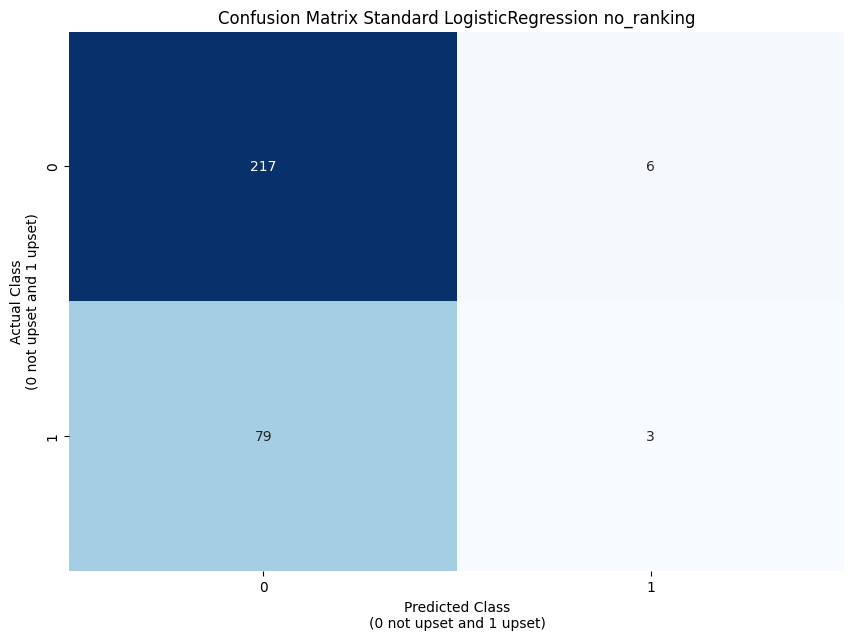

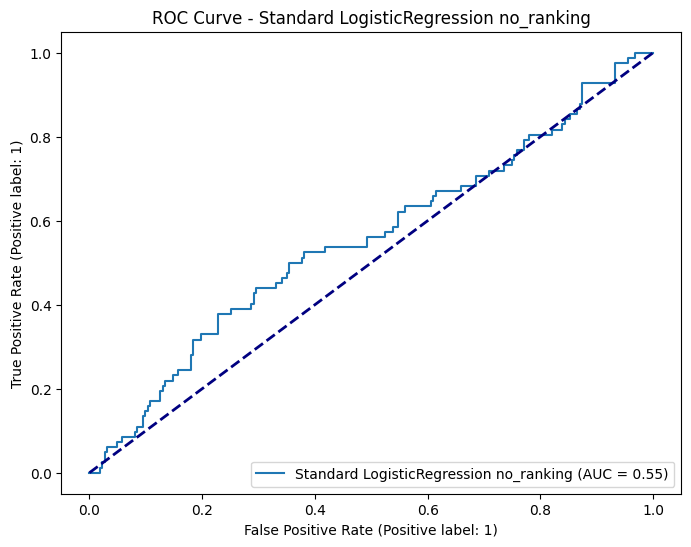

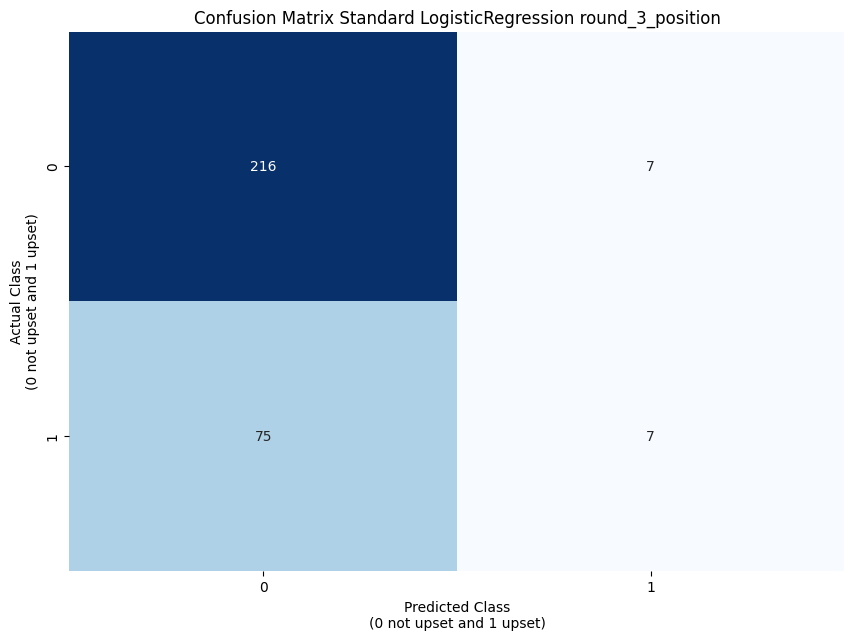

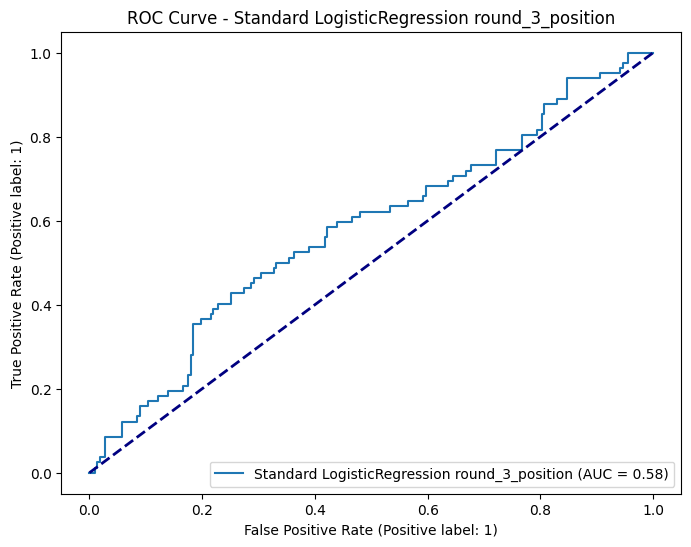

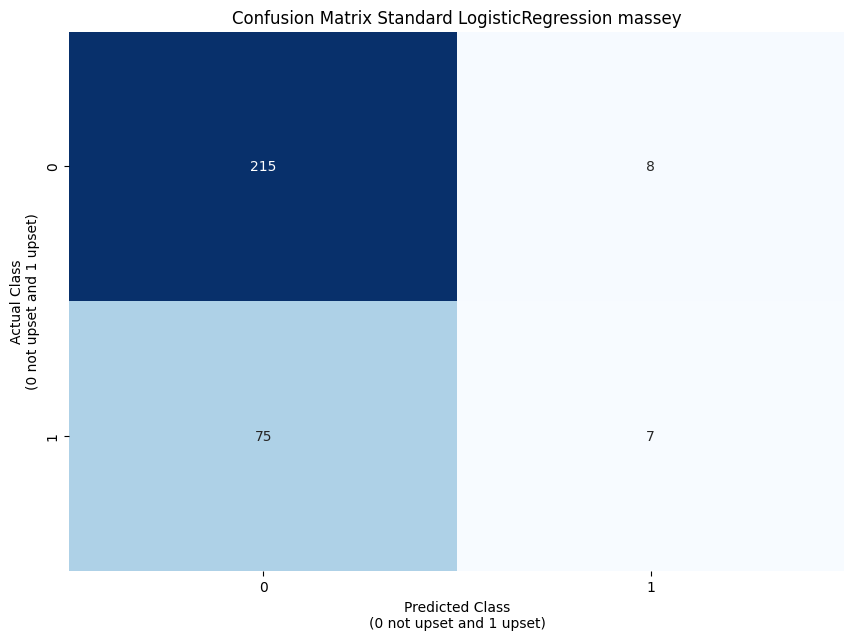

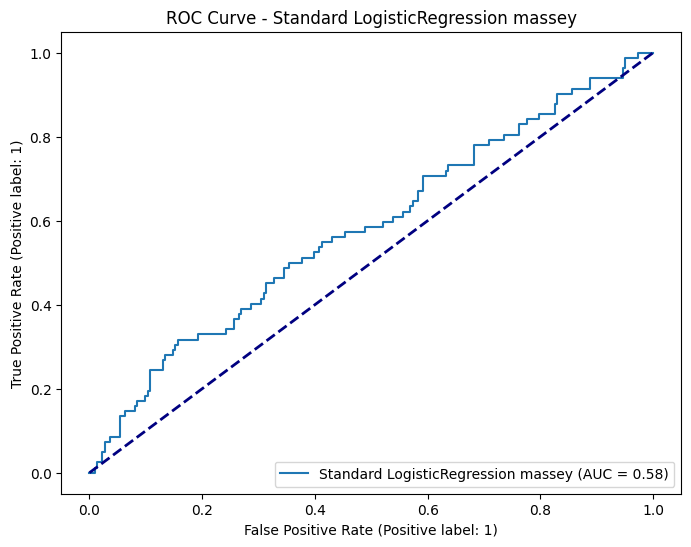

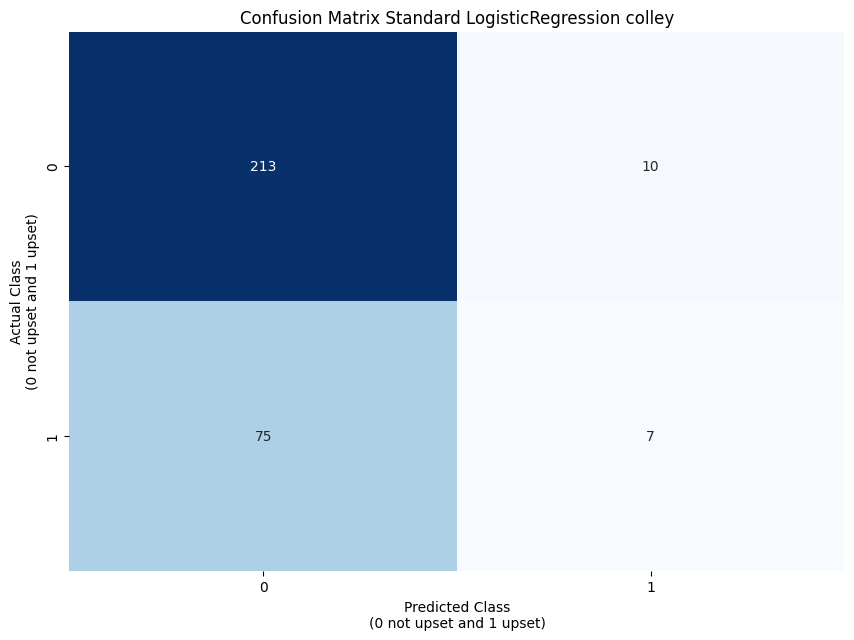

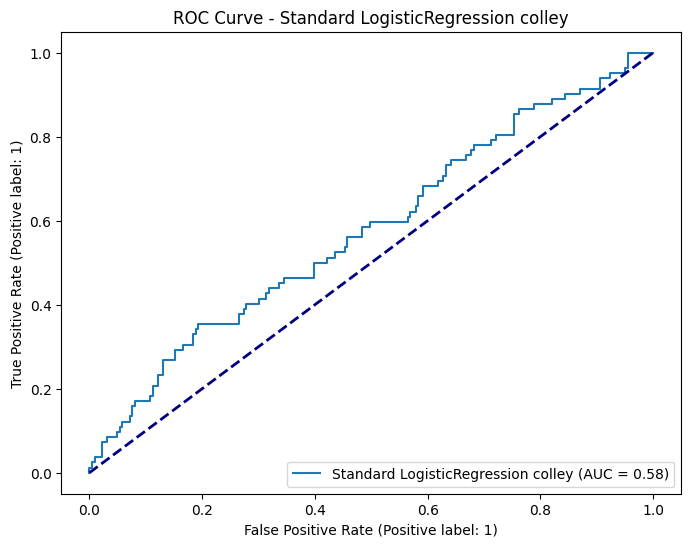

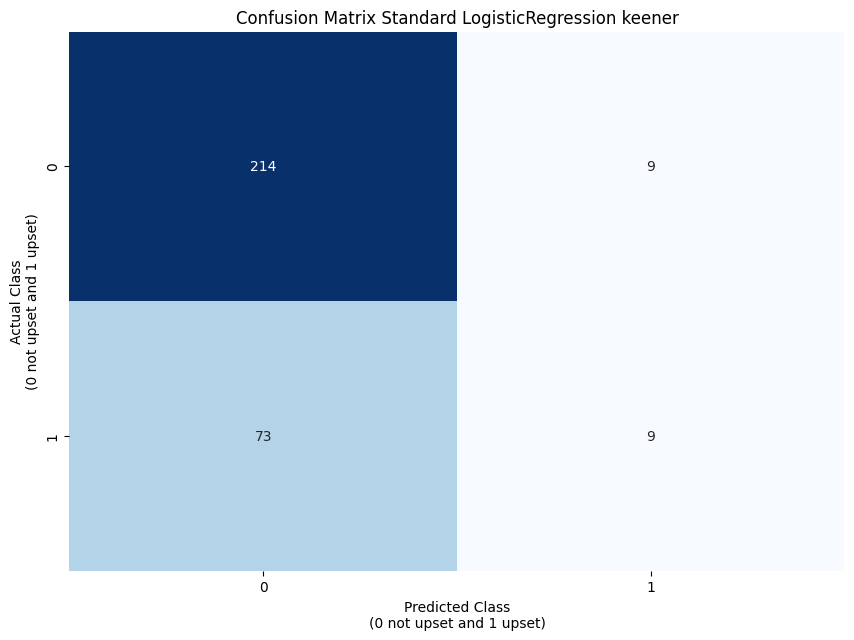

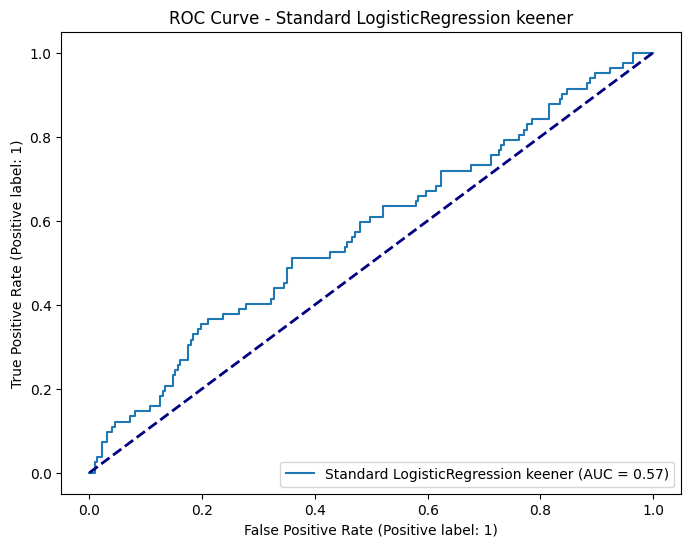

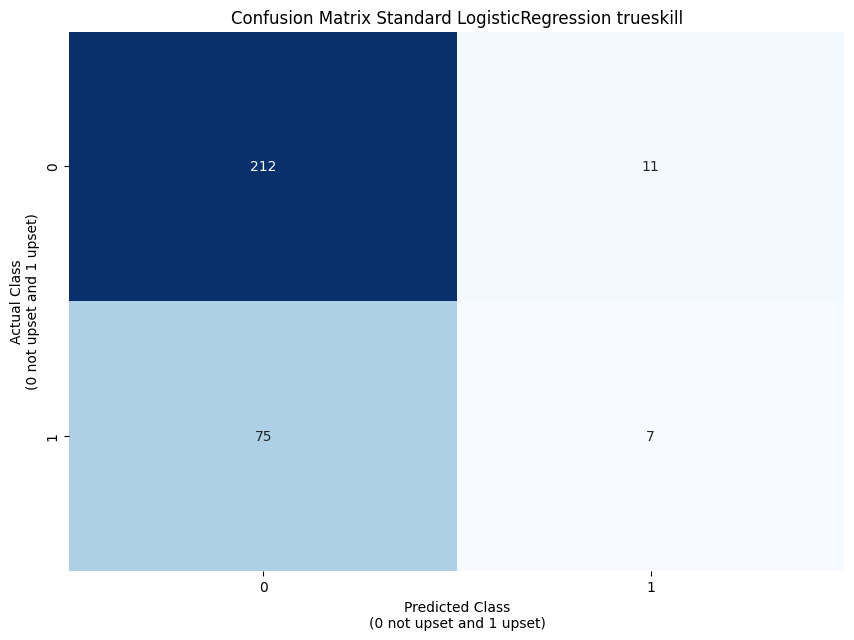

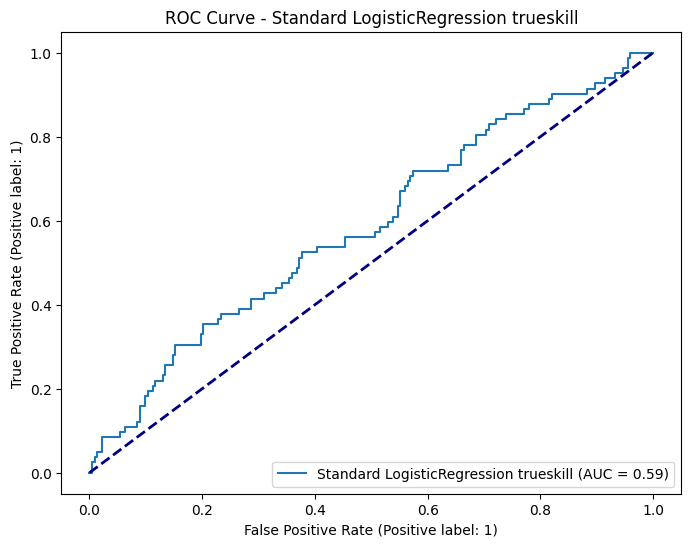

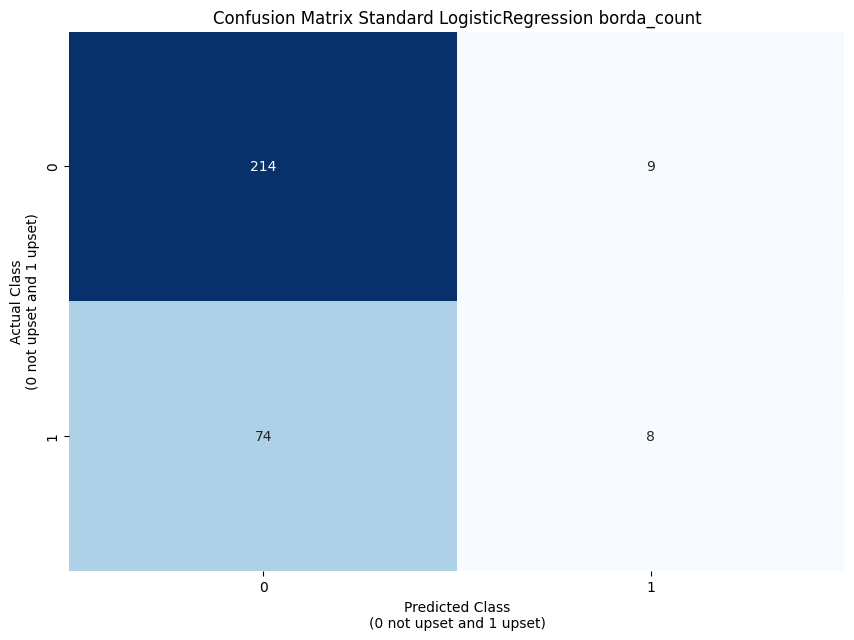

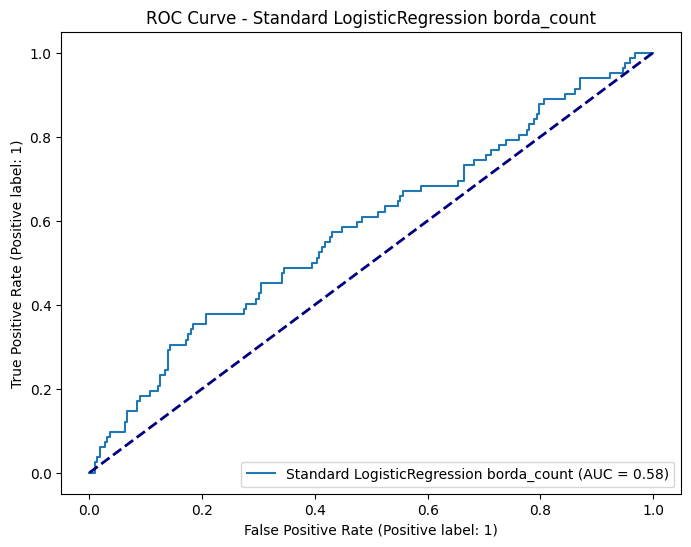

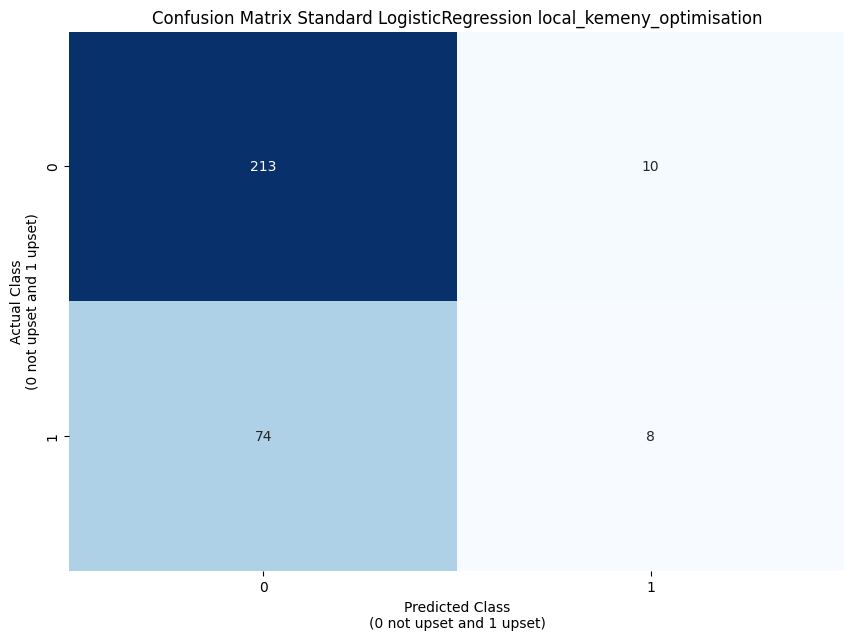

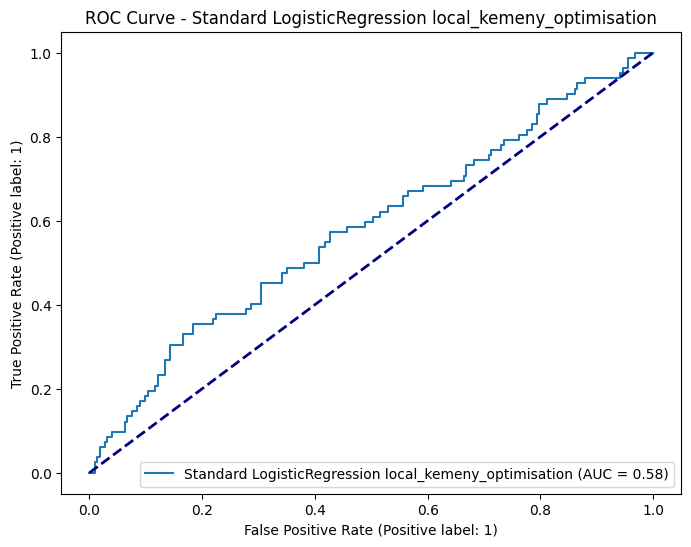

In [ ]:
# Standard, no weights
model_name = "Standard LogisticRegression"
random_state= 47

# Empty df for consolidating confusion report results
all_results_df_slr = pd.DataFrame(columns=['metric_id', 'metric'])

# Define the ranking systems
ranking_systems = ['no_ranking','round_3_position', 'massey', 'colley', 'keener', 'trueskill', 'borda_count', 'local_kemeny_optimisation']

# Get all columns except the target and ranking columns
target_variable = 'target_variable'
base_features = [col for col in fa_cup_raw_features_df.columns if col != target_variable and not any(f"{team}_{ranking}" in col for team in ['home_team', 'away_team'] for ranking in ranking_systems)]

# Identify numeric and categorical columns
numeric_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ranking_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Define cross-validation strategy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

# Loop through each ranking system
for ranking in ranking_systems:
    #print(f"\nRunning model for {ranking} ranking system")
    model_name_ranking = f"{model_name} {ranking}"
    print(model_name_ranking)

    if ranking == 'no_ranking':
        # Use all base features without ranking
        X = fa_cup_raw_features_df[base_features]
    else:
        # Include ranking features
        current_features = base_features + [f'home_team_{ranking}', f'away_team_{ranking}']
        X = fa_cup_raw_features_df[current_features]

    y = fa_cup_raw_features_df['target_variable']

    # Initialize lists to store results for each fold of the model
    fold_accuracies = []
    confusion_matrices = []
    classification_reports = []
    all_y_true = []
    all_y_pred = []
    all_y_pred_proba = []  # Store probabilities for ROC

    # Perform cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Update preprocessor
        if ranking == 'no_ranking':
            preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, numeric_features),
                    ('cat', categorical_transformer, categorical_features)
                ], verbose_feature_names_out=False)

        else:
            preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, numeric_features),
                    ('cat', categorical_transformer, categorical_features),
                    ('rank', numeric_transformer, [f'home_team_{ranking}', f'away_team_{ranking}'])
                ], verbose_feature_names_out=False)

        # Fit preprocessor and transform data
        X_train_preprocessed = preprocessor.fit_transform(X_train)
        X_val_preprocessed = preprocessor.transform(X_val)

        # Create pipeline
        model = Pipeline([
          ('preprocessor', preprocessor),
          ('classifier', LogisticRegression(max_iter=100))
          ])

        # Get feature names after preprocessing
        feature_names = preprocessor.get_feature_names_out()

        # Convert to DataFrame
        X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=feature_names, index=X_train.index)
        X_val_preprocessed_df = pd.DataFrame(X_val_preprocessed, columns=feature_names, index=X_val.index)

        # Simple check for missing values
        if X_train_preprocessed_df.isnull().values.any() or X_val_preprocessed_df.isnull().values.any():
          raise ValueError("Missing values found in preprocessed data. Please review your preprocessing steps.")

        # Fit and predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        y_pred_proba = model.predict_proba(X_val)[:, 1]  # Probabilities for the positive class and ROC curve/AUC Score

        # Calculate accuracy
        accuracy = accuracy_score(y_val, y_pred)
        fold_accuracies.append(accuracy)

        # Confusion matrix
        cm = confusion_matrix(y_val, y_pred)
        confusion_matrices.append(cm)

        # Generate classification report
        cr = classification_report(y_val, y_pred, output_dict=True)
        classification_reports.append(cr)

        # Store true and predicted values for later analysis
        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)
        all_y_pred_proba.extend(y_pred_proba)

        print(f"Fold {fold} Accuracy: {accuracy:.3f}")

    # Calculate average accuracy
    avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    print(f"Average Accuracy: {avg_accuracy:.3f}")

     # Calculate overall metrics
    mean_upset_accuracy = np.mean(fold_accuracies)
    std_upset_accuracy = np.std(fold_accuracies)


    # Create and display results using function
    results_df, cm_fig, roc_fig = create_model_results_df(all_y_true, all_y_pred, fold_accuracies,  all_y_pred_proba, model_name_ranking)
    results_df = results_df.reset_index()
    results_df['metric_id'] = results_df.index + 1
    results_df = results_df[['metric_id', 'metric', model_name_ranking]]

    all_results_df_slr = all_results_df_slr.merge(results_df, on=['metric_id', 'metric'], how='outer')

display(all_results_df_slr)


Standard LogisticRegression with home advantage no_ranking
Fold 1 Accuracy: 0.689
Fold 2 Accuracy: 0.705
Fold 3 Accuracy: 0.738


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 4 Accuracy: 0.754


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 5 Accuracy: 0.721
Average Accuracy: 0.721


metric_id                                       metric  \
0           1                    Cross-validation Accuracy   
1           2                             Overall Accuracy   
2           3   Confusion Matrix - True Negative (Class 0)   
3           4  Confusion Matrix - False Positive (Class 1)   
4           5  Confusion Matrix - False Negative (Class 0)   
5           6   Confusion Matrix - True Positive (Class 1)   
6           7                          Precision (Class 0)   
7           8                             Recall (Class 0)   
8           9                           F1-score (Class 0)   
9          10                          Precision (Class 1)   
10         11                             Recall (Class 1)   
11         12                           F1-score (Class 1)   
12         13                          Macro avg Precision   
13         14                             Macro avg Recall   
14         15                           Macro avg F1-score   
15         16                       Weighted avg Precision   
16         17                          Weighted avg Recall   
17         18                        Weighted avg F1-score   
18         19                                      AUC-ROC   

   Standard LogisticRegression with home advantage no_ranking  
0                                               0.721          
1                                               0.721          
2                                             217.000          
3                                               6.000          
4                                              79.000          
5                                               3.000          
6                                               0.733          
7                                               0.973          
8                                               0.836          
9                                               0.333          
10                                              0.037          
11                                              0.066          
12                                              0.533          
13                                              0.505          
14                                              0.451          
15                                              0.626          
16                                              0.721          
17                                              0.629          
18                                              0.553

Standard LogisticRegression with home advantage round_3_position
Fold 1 Accuracy: 0.705
Fold 2 Accuracy: 0.705
Fold 3 Accuracy: 0.738


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 4 Accuracy: 0.754
Fold 5 Accuracy: 0.754
Average Accuracy: 0.731


metric_id                                       metric  \
0           1                    Cross-validation Accuracy   
1           2                             Overall Accuracy   
2           3   Confusion Matrix - True Negative (Class 0)   
3           4  Confusion Matrix - False Positive (Class 1)   
4           5  Confusion Matrix - False Negative (Class 0)   
5           6   Confusion Matrix - True Positive (Class 1)   
6           7                          Precision (Class 0)   
7           8                             Recall (Class 0)   
8           9                           F1-score (Class 0)   
9          10                          Precision (Class 1)   
10         11                             Recall (Class 1)   
11         12                           F1-score (Class 1)   
12         13                          Macro avg Precision   
13         14                             Macro avg Recall   
14         15                           Macro avg F1-score   
15         16                       Weighted avg Precision   
16         17                          Weighted avg Recall   
17         18                        Weighted avg F1-score   
18         19                                      AUC-ROC   

   Standard LogisticRegression with home advantage no_ranking  \
0                                               0.721           
1                                               0.721           
2                                             217.000           
3                                               6.000           
4                                              79.000           
5                                               3.000           
6                                               0.733           
7                                               0.973           
8                                               0.836           
9                                               0.333           
10                                              0.037           
11                                              0.066           
12                                              0.533           
13                                              0.505           
14                                              0.451           
15                                              0.626           
16                                              0.721           
17                                              0.629           
18                                              0.553           

   Standard LogisticRegression with home advantage round_3_position  
0                                               0.731                
1                                               0.731                
2                                             216.000                
3                                               7.000                
4                                              75.000                
5                                               7.000                
6                                               0.742                
7                                               0.969                
8                                               0.840                
9                                               0.500                
10                                              0.085                
11                                              0.146                
12                                              0.621                
13                                              0.527                
14                                              0.493                
15                                              0.677                
16                                              0.731                
17                                              0.654                
18                                              0.581

Standard LogisticRegression with home advantage massey
Fold 1 Accuracy: 0.721
Fold 2 Accuracy: 0.705
Fold 3 Accuracy: 0.721
Fold 4 Accuracy: 0.754
Fold 5 Accuracy: 0.738
Average Accuracy: 0.728


metric_id                                       metric  \
0           1                    Cross-validation Accuracy   
1           2                             Overall Accuracy   
2           3   Confusion Matrix - True Negative (Class 0)   
3           4  Confusion Matrix - False Positive (Class 1)   
4           5  Confusion Matrix - False Negative (Class 0)   
5           6   Confusion Matrix - True Positive (Class 1)   
6           7                          Precision (Class 0)   
7           8                             Recall (Class 0)   
8           9                           F1-score (Class 0)   
9          10                          Precision (Class 1)   
10         11                             Recall (Class 1)   
11         12                           F1-score (Class 1)   
12         13                          Macro avg Precision   
13         14                             Macro avg Recall   
14         15                           Macro avg F1-score   
15         16                       Weighted avg Precision   
16         17                          Weighted avg Recall   
17         18                        Weighted avg F1-score   
18         19                                      AUC-ROC   

   Standard LogisticRegression with home advantage no_ranking  \
0                                               0.721           
1                                               0.721           
2                                             217.000           
3                                               6.000           
4                                              79.000           
5                                               3.000           
6                                               0.733           
7                                               0.973           
8                                               0.836           
9                                               0.333           
10                                              0.037           
11                                              0.066           
12                                              0.533           
13                                              0.505           
14                                              0.451           
15                                              0.626           
16                                              0.721           
17                                              0.629           
18                                              0.553           

   Standard LogisticRegression with home advantage round_3_position  \
0                                               0.731                 
1                                               0.731                 
2                                             216.000                 
3                                               7.000                 
4                                              75.000                 
5                                               7.000                 
6                                               0.742                 
7                                               0.969                 
8                                               0.840                 
9                                               0.500                 
10                                              0.085                 
11                                              0.146                 
12                                              0.621                 
13                                              0.527                 
14                                              0.493                 
15                                              0.677                 
16                                              0.731                 
17                                              0.654                 
18                                              0.581                 

   Standard LogisticRegression with home 

Standard LogisticRegression with home advantage colley
Fold 1 Accuracy: 0.689
Fold 2 Accuracy: 0.672
Fold 3 Accuracy: 0.754
Fold 4 Accuracy: 0.754
Fold 5 Accuracy: 0.738
Average Accuracy: 0.721


metric_id                                       metric  \
0           1                    Cross-validation Accuracy   
1           2                             Overall Accuracy   
2           3   Confusion Matrix - True Negative (Class 0)   
3           4  Confusion Matrix - False Positive (Class 1)   
4           5  Confusion Matrix - False Negative (Class 0)   
5           6   Confusion Matrix - True Positive (Class 1)   
6           7                          Precision (Class 0)   
7           8                             Recall (Class 0)   
8           9                           F1-score (Class 0)   
9          10                          Precision (Class 1)   
10         11                             Recall (Class 1)   
11         12                           F1-score (Class 1)   
12         13                          Macro avg Precision   
13         14                             Macro avg Recall   
14         15                           Macro avg F1-score   
15         16                       Weighted avg Precision   
16         17                          Weighted avg Recall   
17         18                        Weighted avg F1-score   
18         19                                      AUC-ROC   

   Standard LogisticRegression with home advantage no_ranking  \
0                                               0.721           
1                                               0.721           
2                                             217.000           
3                                               6.000           
4                                              79.000           
5                                               3.000           
6                                               0.733           
7                                               0.973           
8                                               0.836           
9                                               0.333           
10                                              0.037           
11                                              0.066           
12                                              0.533           
13                                              0.505           
14                                              0.451           
15                                              0.626           
16                                              0.721           
17                                              0.629           
18                                              0.553           

   Standard LogisticRegression with home advantage round_3_position  \
0                                               0.731                 
1                                               0.731                 
2                                             216.000                 
3                                               7.000                 
4                                              75.000                 
5                                               7.000                 
6                                               0.742                 
7                                               0.969                 
8                                               0.840                 
9                                               0.500                 
10                                              0.085                 
11                                              0.146                 
12                                              0.621                 
13                                              0.527                 
14                                              0.493                 
15                                              0.677                 
16                                              0.731                 
17                                              0.654                 
18                                              0.581                 

   Standard LogisticRegression with home 

Standard LogisticRegression with home advantage keener
Fold 1 Accuracy: 0.705
Fold 2 Accuracy: 0.689
Fold 3 Accuracy: 0.754
Fold 4 Accuracy: 0.770
Fold 5 Accuracy: 0.738
Average Accuracy: 0.731


metric_id                                       metric  \
0           1                    Cross-validation Accuracy   
1           2                             Overall Accuracy   
2           3   Confusion Matrix - True Negative (Class 0)   
3           4  Confusion Matrix - False Positive (Class 1)   
4           5  Confusion Matrix - False Negative (Class 0)   
5           6   Confusion Matrix - True Positive (Class 1)   
6           7                          Precision (Class 0)   
7           8                             Recall (Class 0)   
8           9                           F1-score (Class 0)   
9          10                          Precision (Class 1)   
10         11                             Recall (Class 1)   
11         12                           F1-score (Class 1)   
12         13                          Macro avg Precision   
13         14                             Macro avg Recall   
14         15                           Macro avg F1-score   
15         16                       Weighted avg Precision   
16         17                          Weighted avg Recall   
17         18                        Weighted avg F1-score   
18         19                                      AUC-ROC   

   Standard LogisticRegression with home advantage no_ranking  \
0                                               0.721           
1                                               0.721           
2                                             217.000           
3                                               6.000           
4                                              79.000           
5                                               3.000           
6                                               0.733           
7                                               0.973           
8                                               0.836           
9                                               0.333           
10                                              0.037           
11                                              0.066           
12                                              0.533           
13                                              0.505           
14                                              0.451           
15                                              0.626           
16                                              0.721           
17                                              0.629           
18                                              0.553           

   Standard LogisticRegression with home advantage round_3_position  \
0                                               0.731                 
1                                               0.731                 
2                                             216.000                 
3                                               7.000                 
4                                              75.000                 
5                                               7.000                 
6                                               0.742                 
7                                               0.969                 
8                                               0.840                 
9                                               0.500                 
10                                              0.085                 
11                                              0.146                 
12                                              0.621                 
13                                              0.527                 
14                                              0.493                 
15                                              0.677                 
16                                              0.731                 
17                                              0.654                 
18                                              0.581                 

   Standard LogisticRegression with home 

Standard LogisticRegression with home advantage trueskill
Fold 1 Accuracy: 0.705
Fold 2 Accuracy: 0.672
Fold 3 Accuracy: 0.754
Fold 4 Accuracy: 0.721
Fold 5 Accuracy: 0.738
Average Accuracy: 0.718


metric_id                                       metric  \
0           1                    Cross-validation Accuracy   
1           2                             Overall Accuracy   
2           3   Confusion Matrix - True Negative (Class 0)   
3           4  Confusion Matrix - False Positive (Class 1)   
4           5  Confusion Matrix - False Negative (Class 0)   
5           6   Confusion Matrix - True Positive (Class 1)   
6           7                          Precision (Class 0)   
7           8                             Recall (Class 0)   
8           9                           F1-score (Class 0)   
9          10                          Precision (Class 1)   
10         11                             Recall (Class 1)   
11         12                           F1-score (Class 1)   
12         13                          Macro avg Precision   
13         14                             Macro avg Recall   
14         15                           Macro avg F1-score   
15         16                       Weighted avg Precision   
16         17                          Weighted avg Recall   
17         18                        Weighted avg F1-score   
18         19                                      AUC-ROC   

   Standard LogisticRegression with home advantage no_ranking  \
0                                               0.721           
1                                               0.721           
2                                             217.000           
3                                               6.000           
4                                              79.000           
5                                               3.000           
6                                               0.733           
7                                               0.973           
8                                               0.836           
9                                               0.333           
10                                              0.037           
11                                              0.066           
12                                              0.533           
13                                              0.505           
14                                              0.451           
15                                              0.626           
16                                              0.721           
17                                              0.629           
18                                              0.553           

   Standard LogisticRegression with home advantage round_3_position  \
0                                               0.731                 
1                                               0.731                 
2                                             216.000                 
3                                               7.000                 
4                                              75.000                 
5                                               7.000                 
6                                               0.742                 
7                                               0.969                 
8                                               0.840                 
9                                               0.500                 
10                                              0.085                 
11                                              0.146                 
12                                              0.621                 
13                                              0.527                 
14                                              0.493                 
15                                              0.677                 
16                                              0.731                 
17                                              0.654                 
18                                              0.581                 

   Standard LogisticRegression with home 

Standard LogisticRegression with home advantage borda_count
Fold 1 Accuracy: 0.705
Fold 2 Accuracy: 0.705
Fold 3 Accuracy: 0.738
Fold 4 Accuracy: 0.754
Fold 5 Accuracy: 0.738
Average Accuracy: 0.728


metric_id                                       metric  \
0           1                    Cross-validation Accuracy   
1           2                             Overall Accuracy   
2           3   Confusion Matrix - True Negative (Class 0)   
3           4  Confusion Matrix - False Positive (Class 1)   
4           5  Confusion Matrix - False Negative (Class 0)   
5           6   Confusion Matrix - True Positive (Class 1)   
6           7                          Precision (Class 0)   
7           8                             Recall (Class 0)   
8           9                           F1-score (Class 0)   
9          10                          Precision (Class 1)   
10         11                             Recall (Class 1)   
11         12                           F1-score (Class 1)   
12         13                          Macro avg Precision   
13         14                             Macro avg Recall   
14         15                           Macro avg F1-score   
15         16                       Weighted avg Precision   
16         17                          Weighted avg Recall   
17         18                        Weighted avg F1-score   
18         19                                      AUC-ROC   

   Standard LogisticRegression with home advantage no_ranking  \
0                                               0.721           
1                                               0.721           
2                                             217.000           
3                                               6.000           
4                                              79.000           
5                                               3.000           
6                                               0.733           
7                                               0.973           
8                                               0.836           
9                                               0.333           
10                                              0.037           
11                                              0.066           
12                                              0.533           
13                                              0.505           
14                                              0.451           
15                                              0.626           
16                                              0.721           
17                                              0.629           
18                                              0.553           

   Standard LogisticRegression with home advantage round_3_position  \
0                                               0.731                 
1                                               0.731                 
2                                             216.000                 
3                                               7.000                 
4                                              75.000                 
5                                               7.000                 
6                                               0.742                 
7                                               0.969                 
8                                               0.840                 
9                                               0.500                 
10                                              0.085                 
11                                              0.146                 
12                                              0.621                 
13                                              0.527                 
14                                              0.493                 
15                                              0.677                 
16                                              0.731                 
17                                              0.654                 
18                                              0.581                 

   Standard LogisticRegression with home 

Standard LogisticRegression with home advantage local_kemeny_optimisation
Fold 1 Accuracy: 0.705
Fold 2 Accuracy: 0.689
Fold 3 Accuracy: 0.738
Fold 4 Accuracy: 0.754
Fold 5 Accuracy: 0.738
Average Accuracy: 0.725


metric_id                                       metric  \
0           1                    Cross-validation Accuracy   
1           2                             Overall Accuracy   
2           3   Confusion Matrix - True Negative (Class 0)   
3           4  Confusion Matrix - False Positive (Class 1)   
4           5  Confusion Matrix - False Negative (Class 0)   
5           6   Confusion Matrix - True Positive (Class 1)   
6           7                          Precision (Class 0)   
7           8                             Recall (Class 0)   
8           9                           F1-score (Class 0)   
9          10                          Precision (Class 1)   
10         11                             Recall (Class 1)   
11         12                           F1-score (Class 1)   
12         13                          Macro avg Precision   
13         14                             Macro avg Recall   
14         15                           Macro avg F1-score   
15         16                       Weighted avg Precision   
16         17                          Weighted avg Recall   
17         18                        Weighted avg F1-score   
18         19                                      AUC-ROC   

   Standard LogisticRegression with home advantage no_ranking  \
0                                               0.721           
1                                               0.721           
2                                             217.000           
3                                               6.000           
4                                              79.000           
5                                               3.000           
6                                               0.733           
7                                               0.973           
8                                               0.836           
9                                               0.333           
10                                              0.037           
11                                              0.066           
12                                              0.533           
13                                              0.505           
14                                              0.451           
15                                              0.626           
16                                              0.721           
17                                              0.629           
18                                              0.553           

   Standard LogisticRegression with home advantage round_3_position  \
0                                               0.731                 
1                                               0.731                 
2                                             216.000                 
3                                               7.000                 
4                                              75.000                 
5                                               7.000                 
6                                               0.742                 
7                                               0.969                 
8                                               0.840                 
9                                               0.500                 
10                                              0.085                 
11                                              0.146                 
12                                              0.621                 
13                                              0.527                 
14                                              0.493                 
15                                              0.677                 
16                                              0.731                 
17                                              0.654                 
18                                              0.581                 

   Standard LogisticRegression with home 

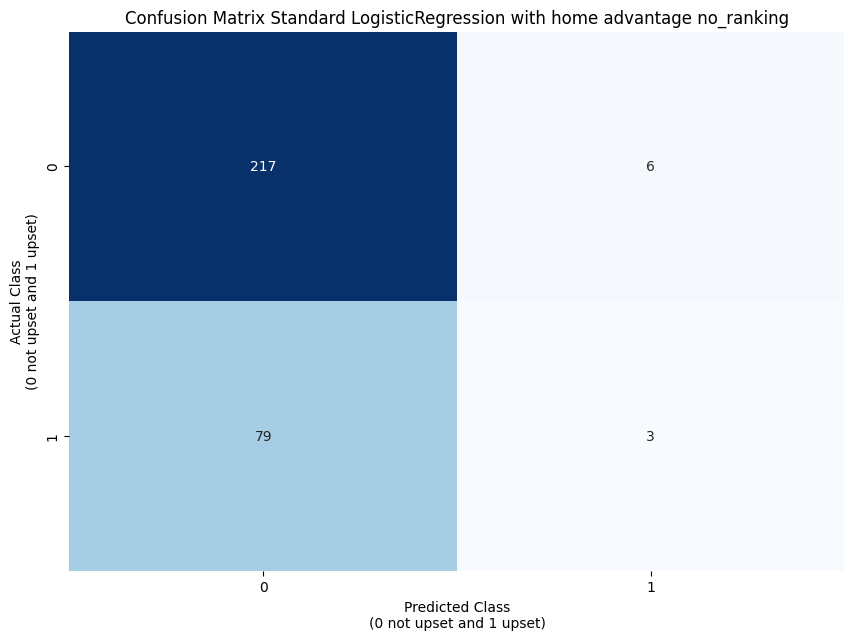

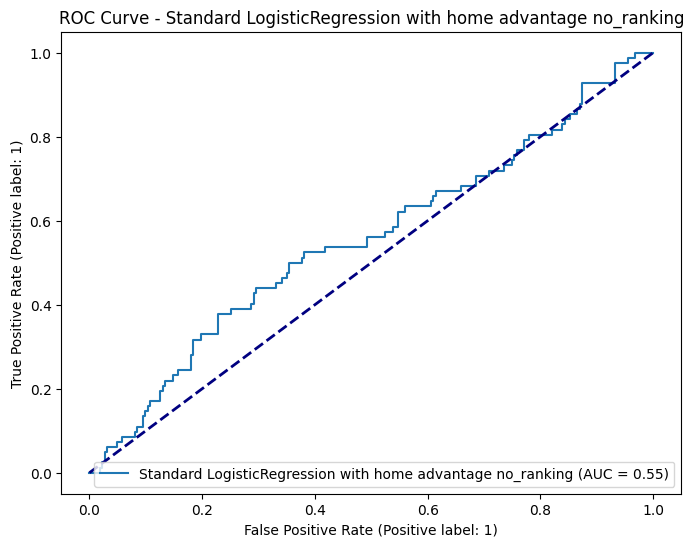

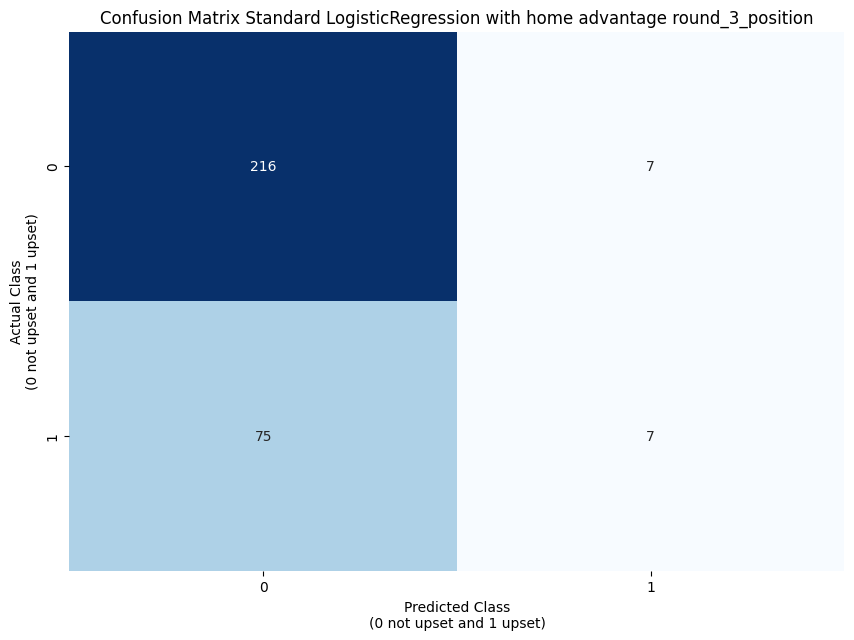

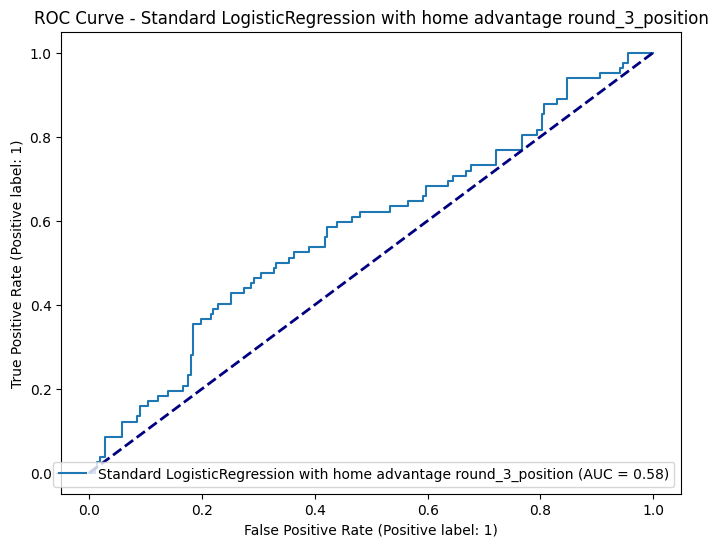

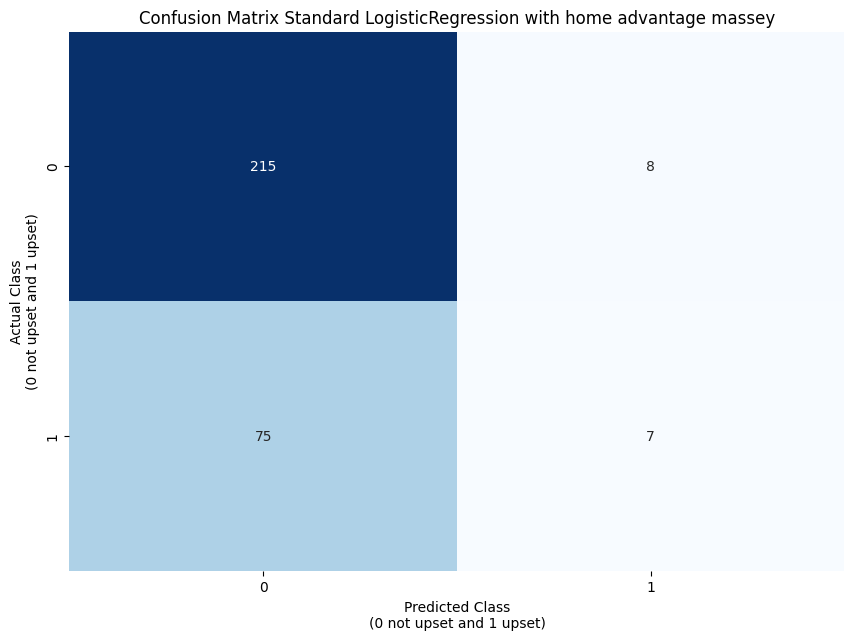

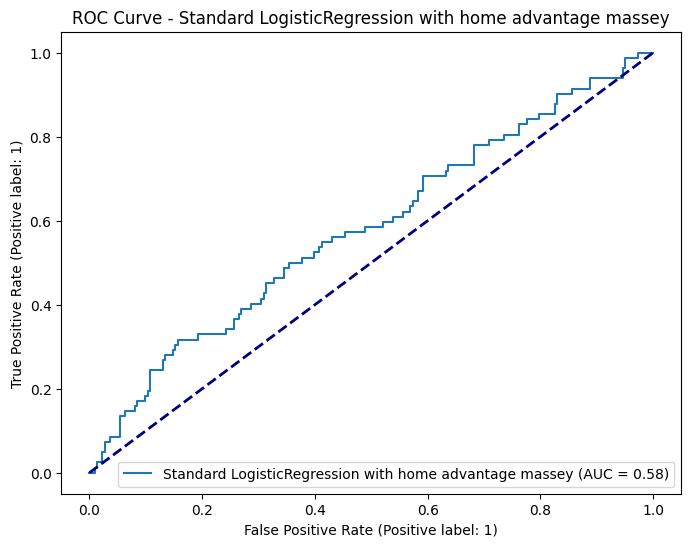

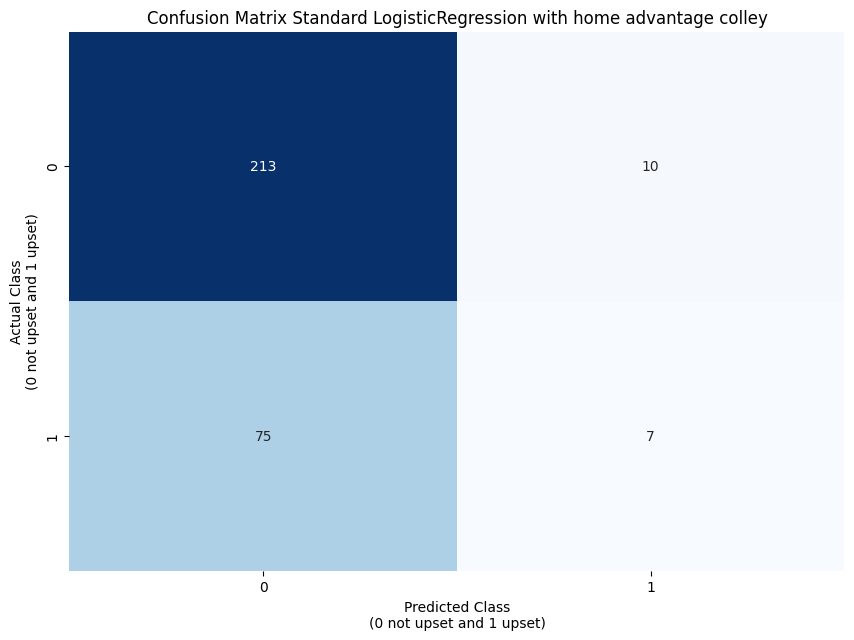

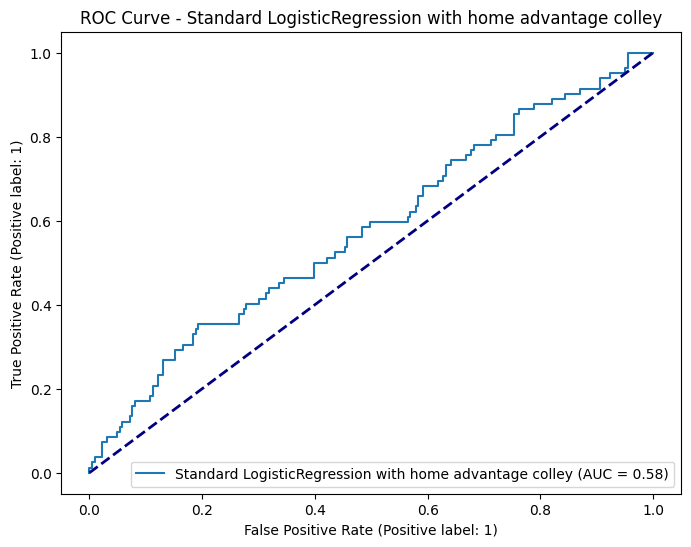

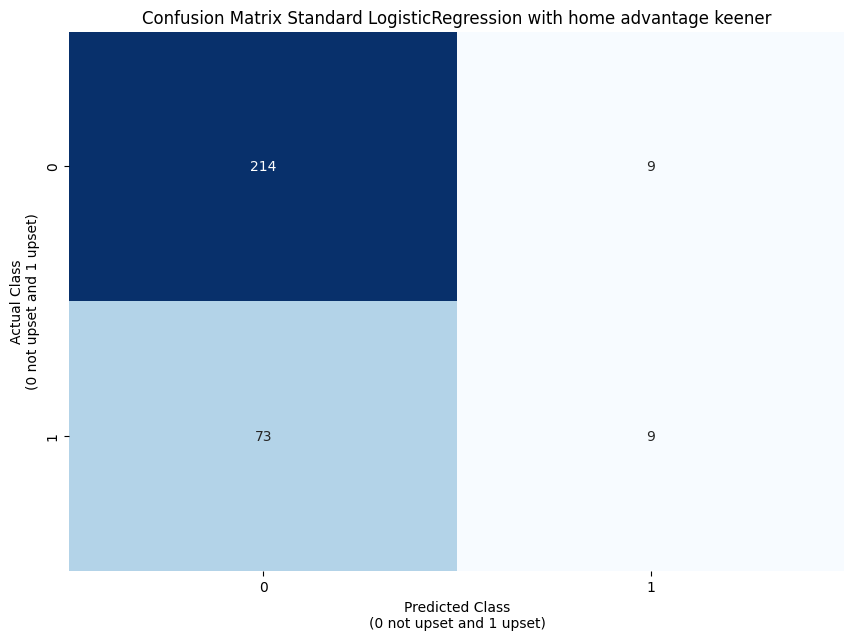

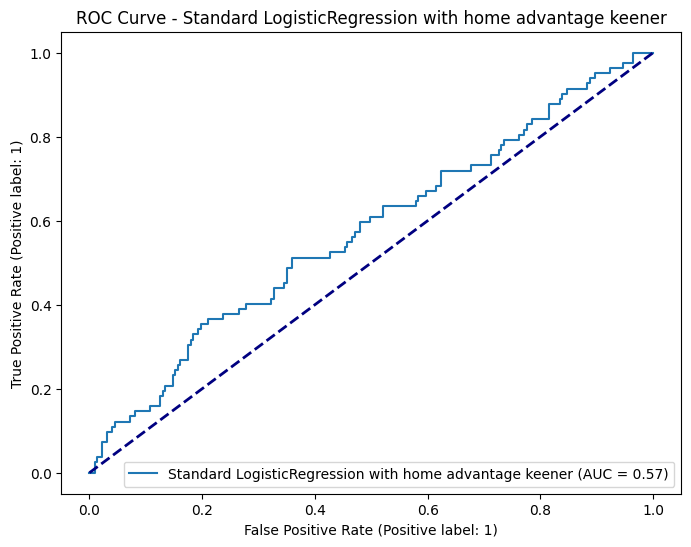

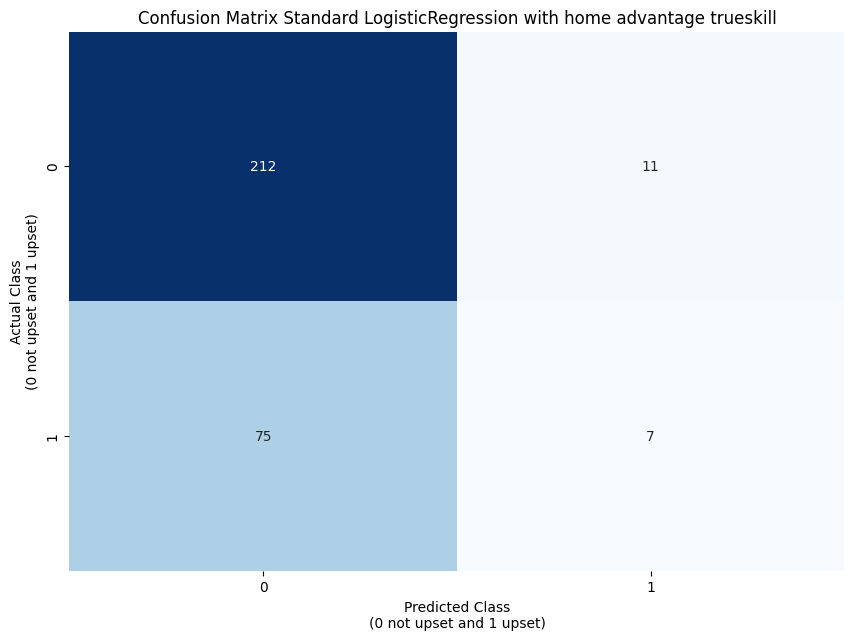

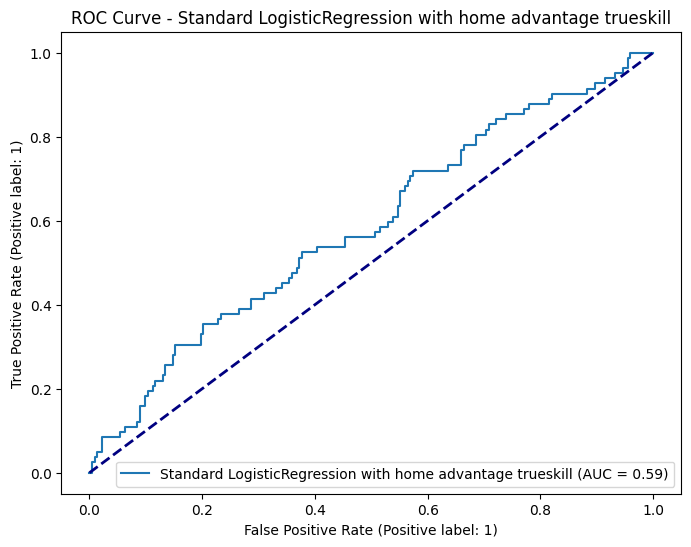

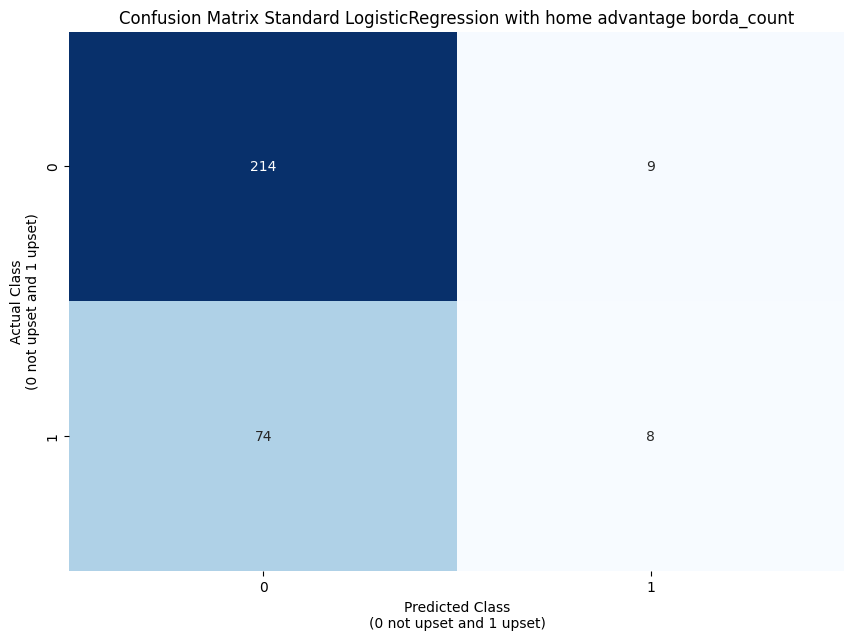

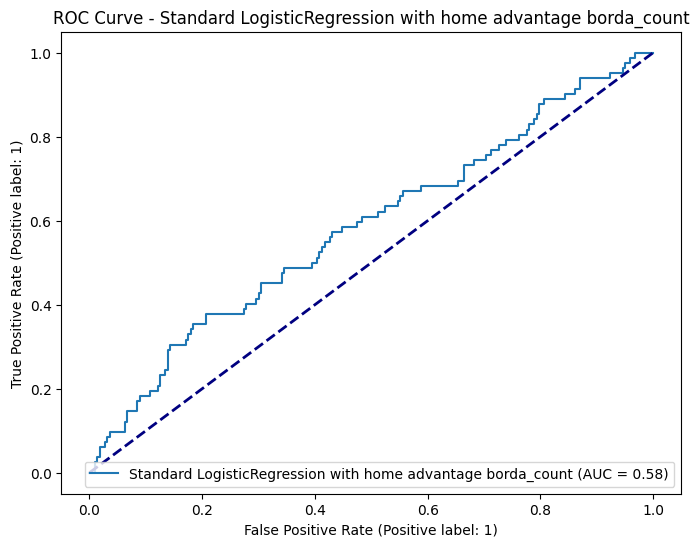

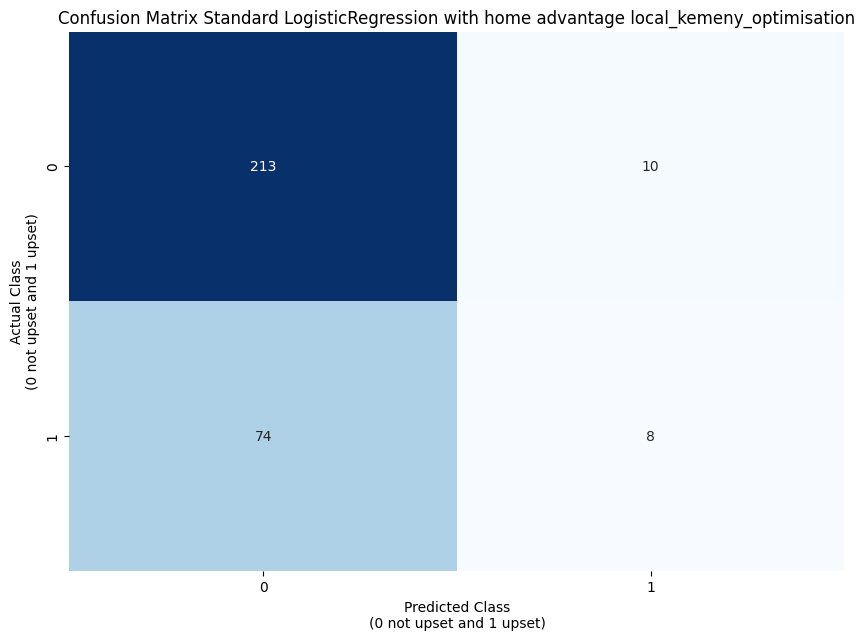

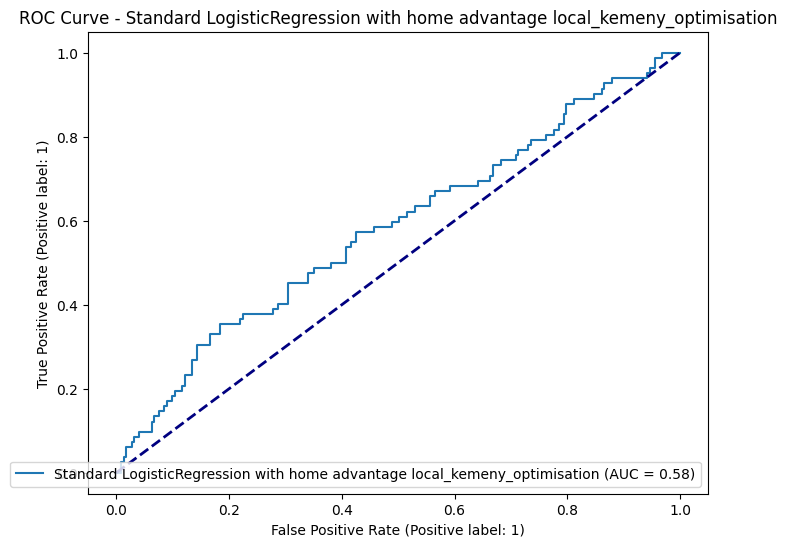

In [ ]:
# Standard, no weights with home advantage
model_name = "Standard LogisticRegression with home advantage"
random_state= 47

# Empty df for consolidating confusion report results
all_results_df_slrh = pd.DataFrame(columns=['metric_id', 'metric'])

# Define the ranking systems
ranking_systems = ['no_ranking','round_3_position', 'massey', 'colley', 'keener', 'trueskill', 'borda_count', 'local_kemeny_optimisation']

# Get all columns except the target and ranking columns
target_variable = 'target_variable'
base_features = [col for col in fa_cup_raw_features_df.columns if col != target_variable and not any(f"{team}_{ranking}" in col for team in ['home_team', 'away_team'] for ranking in ranking_systems)]

# Identify numeric and categorical columns
numeric_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ranking_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Define cross-validation strategy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

# Loop through each ranking system
for ranking in ranking_systems:
    #print(f"\nRunning model for {ranking} ranking system")
    model_name_ranking = f"{model_name} {ranking}"
    print(model_name_ranking)

    if ranking == 'no_ranking':
        # Use all base features without ranking
        X = fa_cup_raw_features_df[base_features]
    else:
        # Prepare the feature set for the current ranking system to Include ranking features
        current_features = base_features + [f'home_team_{ranking}', f'away_team_{ranking}']
        X = fa_cup_raw_features_df[current_features]

    y = fa_cup_raw_features_df['target_variable']

    # Initialize lists to store results for each fold of the model
    fold_accuracies = []
    confusion_matrices = []
    classification_reports = []
    all_y_true = []
    all_y_pred = []
    all_y_pred_proba = []  # Store probabilities for ROC

    # Perform cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Add home advantage factor
        X_train, home_advantage_column = add_home_advantage(X_train)
        X_val, _ = add_home_advantage(X_val)

        # Update numeric_features to include the home advantage column
        numeric_features_with_ha = [home_advantage_column] + numeric_features

        # Update preprocessor
        if ranking == 'no_ranking':
            preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, numeric_features),
                    ('cat', categorical_transformer, categorical_features)
                ], verbose_feature_names_out=False)

        else:
            preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, numeric_features),
                    ('cat', categorical_transformer, categorical_features),
                    ('rank', numeric_transformer, [f'home_team_{ranking}', f'away_team_{ranking}'])
                ], verbose_feature_names_out=False)

        # Fit preprocessor and transform data
        X_train_preprocessed = preprocessor.fit_transform(X_train)
        X_val_preprocessed = preprocessor.transform(X_val)

        # Create pipeline
        model = Pipeline([
          ('preprocessor', preprocessor),
          ('classifier', LogisticRegression(max_iter=100))
          ])

        # Get feature names after preprocessing
        feature_names = preprocessor.get_feature_names_out()

        # Convert to DataFrame
        X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=feature_names, index=X_train.index)
        X_val_preprocessed_df = pd.DataFrame(X_val_preprocessed, columns=feature_names, index=X_val.index)

        # Simple check for missing values
        if X_train_preprocessed_df.isnull().values.any() or X_val_preprocessed_df.isnull().values.any():
          raise ValueError("Missing values found in preprocessed data. Please review your preprocessing steps.")

        #print(f"\nFold {fold}")
        #print("Preprocessed Train data:")
        #display(X_train_preprocessed_df)
        #print("\nPreprocessed Test data:")
        #display(pd.concat([X_val_preprocessed_df, y_val], axis=1))

        # Fit and predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        y_pred_proba = model.predict_proba(X_val)[:, 1]  # Probabilities for the positive class and ROC curve/AUC Score


        # Calculate accuracy
        accuracy = accuracy_score(y_val, y_pred)
        fold_accuracies.append(accuracy)

        # Confusion matrix
        cm = confusion_matrix(y_val, y_pred)
        confusion_matrices.append(cm)

        # Generate classification report
        cr = classification_report(y_val, y_pred, output_dict=True)
        classification_reports.append(cr)

        # Store true and predicted values for later analysis
        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)
        all_y_pred_proba.extend(y_pred_proba)

        print(f"Fold {fold} Accuracy: {accuracy:.3f}")

    # Calculate average accuracy
    avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    print(f"Average Accuracy: {avg_accuracy:.3f}")

    # Create and display results using existing function
    results_df, cm_fig, roc_fig = create_model_results_df(all_y_true, all_y_pred, fold_accuracies,  all_y_pred_proba, model_name_ranking)
    results_df = results_df.reset_index()
    results_df['metric_id'] = results_df.index + 1
    results_df = results_df[['metric_id', 'metric', model_name_ranking]]

    all_results_df_slrh = all_results_df_slrh.merge(results_df, on=['metric_id', 'metric'], how='outer')

  display(all_results_df_slrh)


In [ ]:
# Weighted Logistc Regression
model_name = "Weighted LogisticRegression"
random_state= 47

# Function to calculate weights
def calculate_weights(y):
    class_counts = y.value_counts()
    total_samples = len(y)
    return {class_label: int(round((1 - (count / total_samples)) * 100))
            for class_label, count in class_counts.items()}

# Empty df for consolidating confusion report results
all_results_df_wlr = pd.DataFrame(columns=['metric_id', 'metric'])

# Define the ranking systems
ranking_systems = ['no_ranking','round_3_position', 'massey', 'colley', 'keener', 'trueskill', 'borda_count', 'local_kemeny_optimisation']

# Get all columns except the target and ranking columns
target_variable = 'target_variable'
base_features = [col for col in fa_cup_raw_features_df.columns if col != target_variable and not any(f"{team}_{ranking}" in col for team in ['home_team', 'away_team'] for ranking in ranking_systems)]


# Identify numeric and categorical columns
numeric_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ranking_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Define cross-validation strategy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

# Loop through each ranking system
for ranking in ranking_systems:
    model_name_ranking = f"{model_name} {ranking}"
    print(model_name_ranking)

    if ranking == 'no_ranking':
        # Use all base features without ranking
        X = fa_cup_raw_features_df[base_features]
    else:
        # Prepare the feature set for the current ranking system to Include ranking features
        current_features = base_features + [f'home_team_{ranking}', f'away_team_{ranking}']
        X = fa_cup_raw_features_df[current_features]

    y = fa_cup_raw_features_df['target_variable']

    # Initialize lists to store results for each fold of the model
    fold_accuracies = []
    confusion_matrices = []
    classification_reports = []
    all_y_true = []
    all_y_pred = []
    all_y_pred_proba = []  # Store probabilities for ROC

    # Perform cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Update preprocessor with current features including home advantage
        if ranking == 'no_ranking':
            preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, numeric_features),
                    ('cat', categorical_transformer, categorical_features)
                ], verbose_feature_names_out=False)

        else:
            preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, numeric_features),
                    ('cat', categorical_transformer, categorical_features),
                    ('rank', numeric_transformer, [f'home_team_{ranking}', f'away_team_{ranking}'])
                ], verbose_feature_names_out=False)

        # Fit preprocessor and transform data
        X_train_preprocessed = preprocessor.fit_transform(X_train)
        X_val_preprocessed = preprocessor.transform(X_val)

        # Get feature names after preprocessing
        feature_names = preprocessor.get_feature_names_out()

        # Convert to DataFrame
        X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=feature_names, index=X_train.index)
        X_val_preprocessed_df = pd.DataFrame(X_val_preprocessed, columns=feature_names, index=X_val.index)

        # Calculate weights using only training data
        weights = calculate_weights(y_train)

        # Create pipeline
        model = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', LogisticRegression(class_weight=weights,max_iter=1000))
        ])


        # Simple check for missing values
        if X_train_preprocessed_df.isnull().values.any() or X_val_preprocessed_df.isnull().values.any():
          raise ValueError("Missing values found in preprocessed data. Please review your preprocessing steps.")

        # Fit and predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        y_pred_proba = model.predict_proba(X_val)[:, 1]  # Probabilities for the positive class and ROC curve/AUC Score

        # Calculate accuracy
        accuracy = accuracy_score(y_val, y_pred)
        fold_accuracies.append(accuracy)

        # Confusion matrix
        cm = confusion_matrix(y_val, y_pred)
        confusion_matrices.append(cm)

        # Generate classification report
        cr = classification_report(y_val, y_pred, output_dict=True)
        classification_reports.append(cr)

        # Store true and predicted values for later analysis
        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)
        all_y_pred_proba.extend(y_pred_proba)

        print(f"Fold {fold} Accuracy: {accuracy:.3f}")

    # Calculate average accuracy
    avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    print(f"Average Accuracy: {avg_accuracy:.3f}")

    # Create and display results using existing function
    results_df, cm_fig, roc_fig = create_model_results_df(all_y_true, all_y_pred, fold_accuracies,  all_y_pred_proba, model_name_ranking)
    results_df = results_df.reset_index()
    results_df['metric_id'] = results_df.index + 1
    results_df = results_df[['metric_id', 'metric', model_name_ranking]]

    all_results_df_wlr = all_results_df_wlr.merge(results_df, on=['metric_id', 'metric'], how='outer')

display(all_results_df_wlr)


metric_id                                       metric  \
0           1                    Cross-validation Accuracy   
1           2                             Overall Accuracy   
2           3   Confusion Matrix - True Negative (Class 0)   
3           4  Confusion Matrix - False Positive (Class 1)   
4           5  Confusion Matrix - False Negative (Class 0)   
5           6   Confusion Matrix - True Positive (Class 1)   
6           7                          Precision (Class 0)   
7           8                             Recall (Class 0)   
8           9                           F1-score (Class 0)   
9          10                          Precision (Class 1)   
10         11                             Recall (Class 1)   
11         12                           F1-score (Class 1)   
12         13                          Macro avg Precision   
13         14                             Macro avg Recall   
14         15                           Macro avg F1-score   
15         16                       Weighted avg Precision   
16         17                          Weighted avg Recall   
17         18                        Weighted avg F1-score   
18         19                                      AUC-ROC   

   Weighted LogisticRegression no_ranking  \
0                                   0.551   
1                                   0.551   
2                                 129.000   
3                                  94.000   
4                                  43.000   
5                                  39.000   
6                                   0.750   
7                                   0.578   
8                                   0.653   
9                                   0.293   
10                                  0.476   
11                                  0.363   
12                                  0.522   
13                                  0.527   
14                                  0.508   
15                                  0.627   
16                                  0.551   
17                                  0.575   
18                                  0.538   

   Weighted LogisticRegression round_3_position  \
0                                         0.570   
1                                         0.570   
2                                       134.000   
3                                        89.000   
4                                        42.000   
5                                        40.000   
6                                         0.761   
7                                         0.601   
8                                         0.672   
9                                         0.310   
10                                        0.488   
11                                        0.379   
12                                        0.536   
13                                        0.544   
14                                        0.525   
15                                        0.640   
16                                        0.570   
17                                        0.593   
18                                        0.573   

   Weighted LogisticRegression massey Weighted LogisticRegression colley  \
0                               0.570                              0.561   
1                               0.570                              0.561   
2                             135.000                            135.000   
3                              88.000                             88.000   
4                              43.000                             46.000   
5                              39.000                             36.000   
6                               0.758                              0.746   
7                               0.605                              0.605   
8                               0.673                              0.668   
9                               0.307                              0.290   
10   

Weighted LogisticRegression with home advantage no_ranking
Fold 1 Accuracy: 0.738
Fold 2 Accuracy: 0.443
Fold 3 Accuracy: 0.525
Fold 4 Accuracy: 0.525
Fold 5 Accuracy: 0.525
Average Accuracy: 0.551
Weighted LogisticRegression with home advantage round_3_position
Fold 1 Accuracy: 0.738
Fold 2 Accuracy: 0.492
Fold 3 Accuracy: 0.508
Fold 4 Accuracy: 0.574
Fold 5 Accuracy: 0.541
Average Accuracy: 0.570
Weighted LogisticRegression with home advantage massey
Fold 1 Accuracy: 0.721
Fold 2 Accuracy: 0.475
Fold 3 Accuracy: 0.525
Fold 4 Accuracy: 0.541
Fold 5 Accuracy: 0.590
Average Accuracy: 0.570
Weighted LogisticRegression with home advantage colley
Fold 1 Accuracy: 0.705
Fold 2 Accuracy: 0.459
Fold 3 Accuracy: 0.508
Fold 4 Accuracy: 0.508
Fold 5 Accuracy: 0.623
Average Accuracy: 0.561
Weighted LogisticRegression with home advantage keener
Fold 1 Accuracy: 0.705
Fold 2 Accuracy: 0.459
Fold 3 Accuracy: 0.492
Fold 4 Accuracy: 0.525
Fold 5 Accuracy: 0.607
Average Accuracy: 0.557
Weighted Logisti

metric_id                                       metric  \
0           1                    Cross-validation Accuracy   
1           2                             Overall Accuracy   
2           3   Confusion Matrix - True Negative (Class 0)   
3           4  Confusion Matrix - False Positive (Class 1)   
4           5  Confusion Matrix - False Negative (Class 0)   
5           6   Confusion Matrix - True Positive (Class 1)   
6           7                          Precision (Class 0)   
7           8                             Recall (Class 0)   
8           9                           F1-score (Class 0)   
9          10                          Precision (Class 1)   
10         11                             Recall (Class 1)   
11         12                           F1-score (Class 1)   
12         13                          Macro avg Precision   
13         14                             Macro avg Recall   
14         15                           Macro avg F1-score   
15         16                       Weighted avg Precision   
16         17                          Weighted avg Recall   
17         18                        Weighted avg F1-score   
18         19                                      AUC-ROC   

   Weighted LogisticRegression with home advantage no_ranking  \
0                                               0.551           
1                                               0.551           
2                                             129.000           
3                                              94.000           
4                                              43.000           
5                                              39.000           
6                                               0.750           
7                                               0.578           
8                                               0.653           
9                                               0.293           
10                                              0.476           
11                                              0.363           
12                                              0.522           
13                                              0.527           
14                                              0.508           
15                                              0.627           
16                                              0.551           
17                                              0.575           
18                                              0.538           

   Weighted LogisticRegression with home advantage round_3_position  \
0                                               0.570                 
1                                               0.570                 
2                                             134.000                 
3                                              89.000                 
4                                              42.000                 
5                                              40.000                 
6                                               0.761                 
7                                               0.601                 
8                                               0.672                 
9                                               0.310                 
10                                              0.488                 
11                                              0.379                 
12                                              0.536                 
13                                              0.544                 
14                                              0.525                 
15                                              0.640                 
16                                              0.570                 
17                                              0.593                 
18                                              0.573                 

   Weighted LogisticRegression with home 

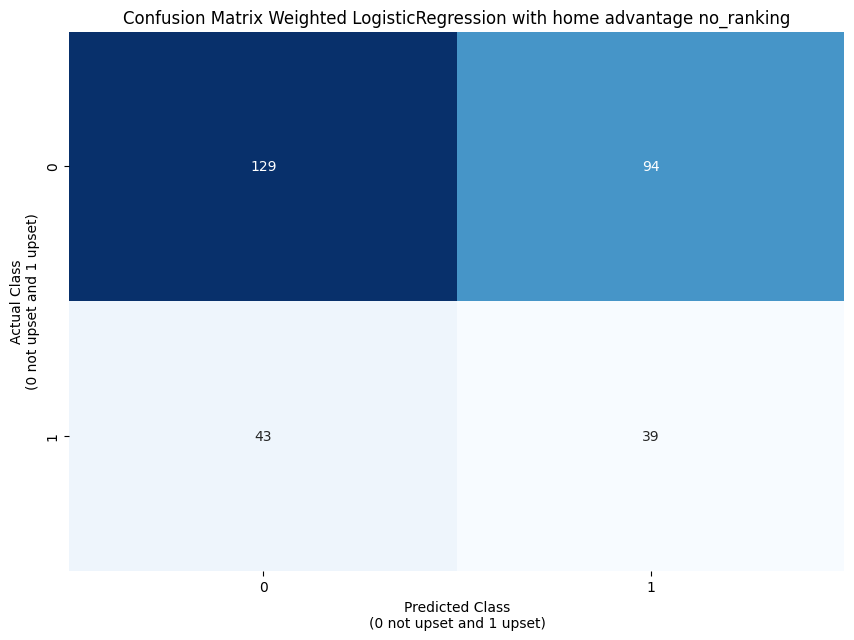

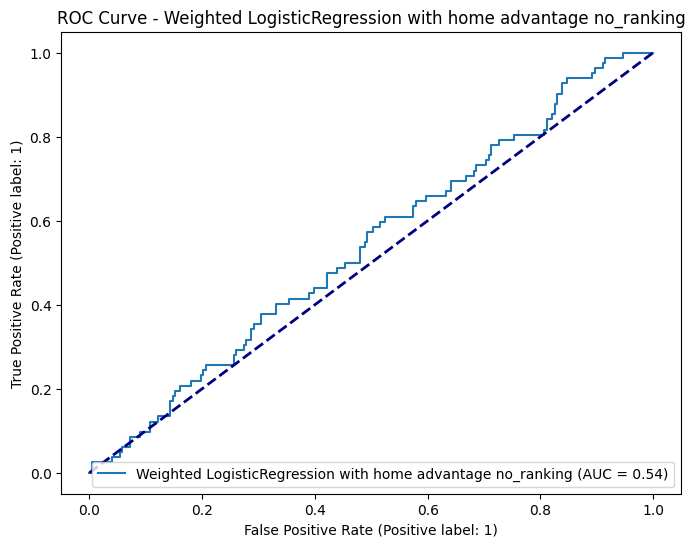

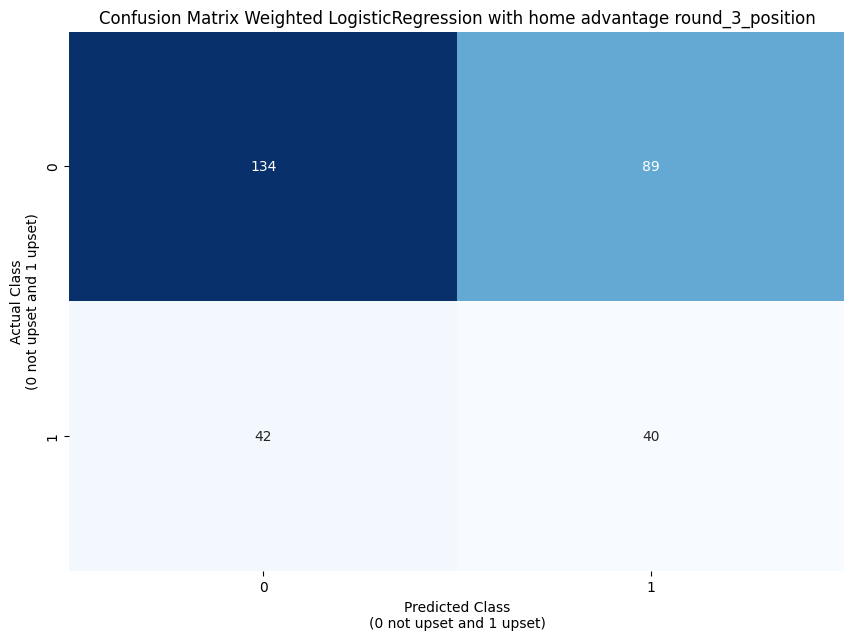

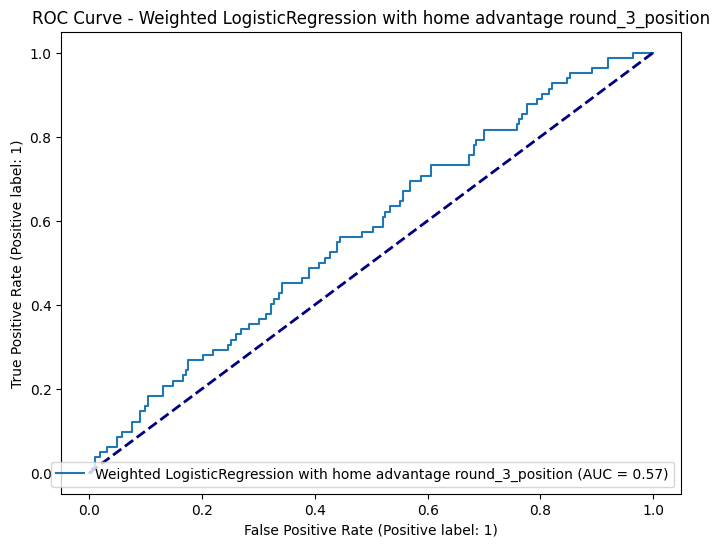

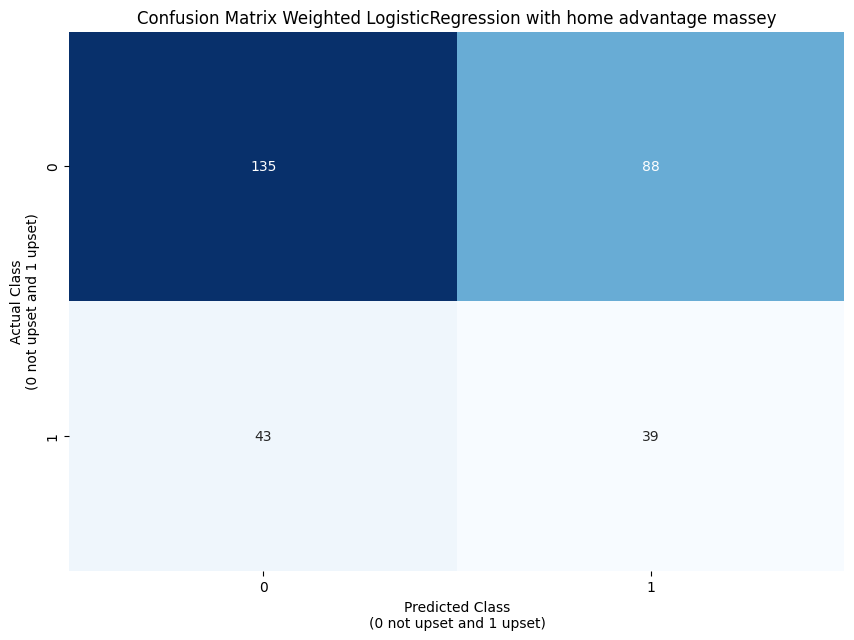

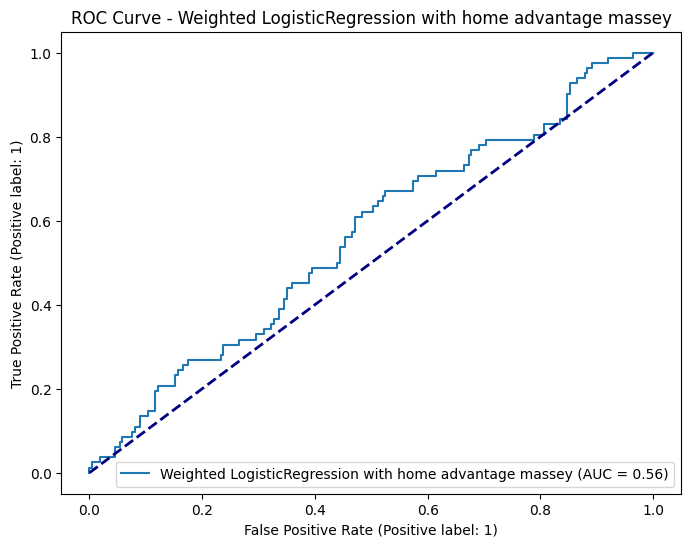

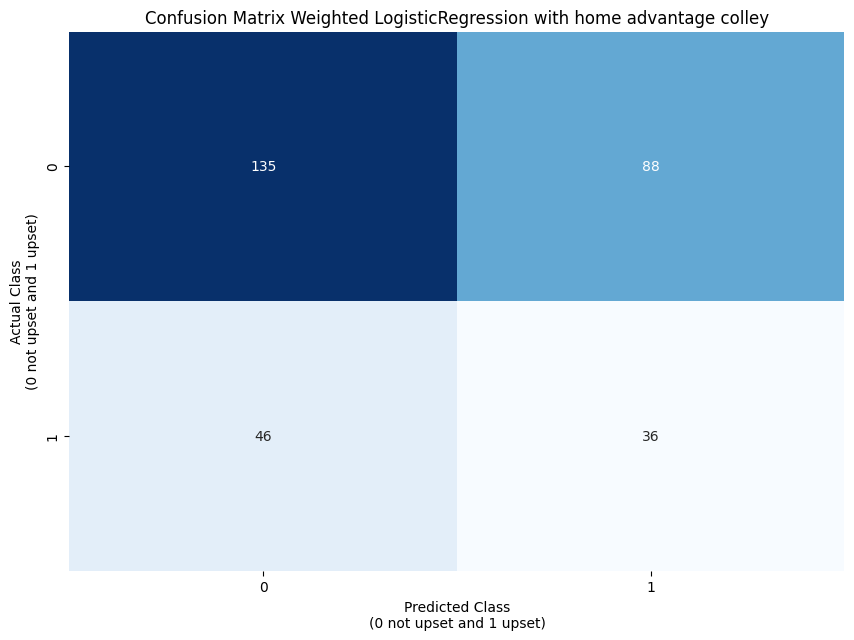

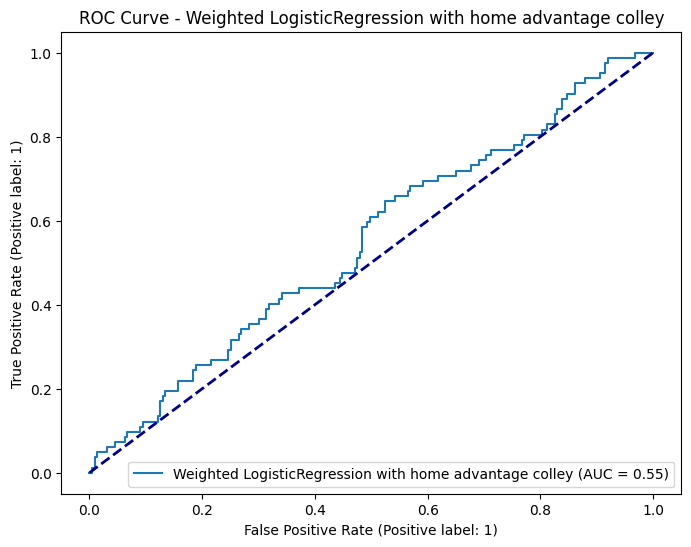

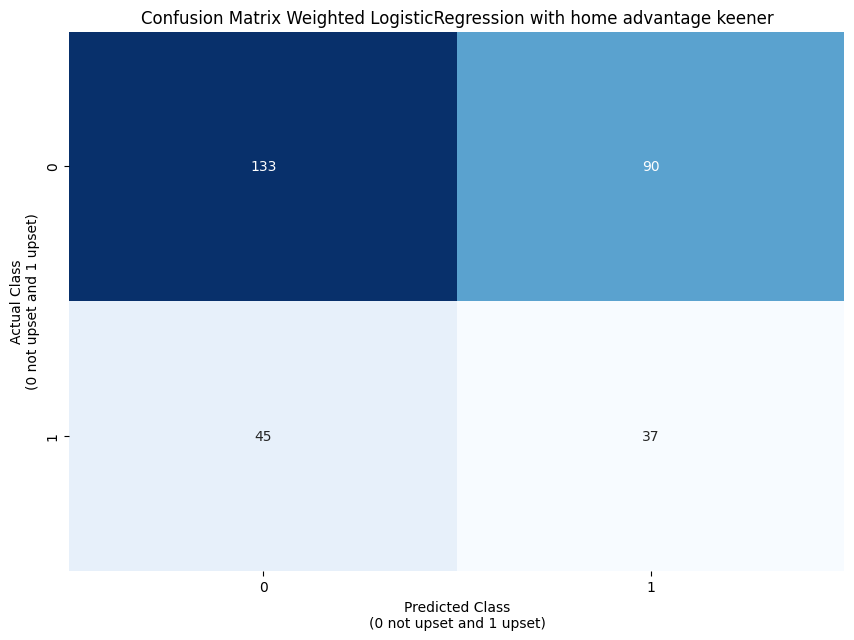

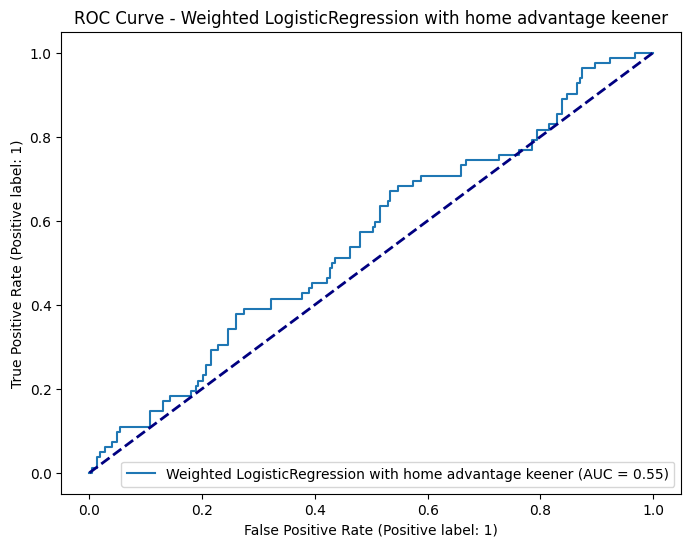

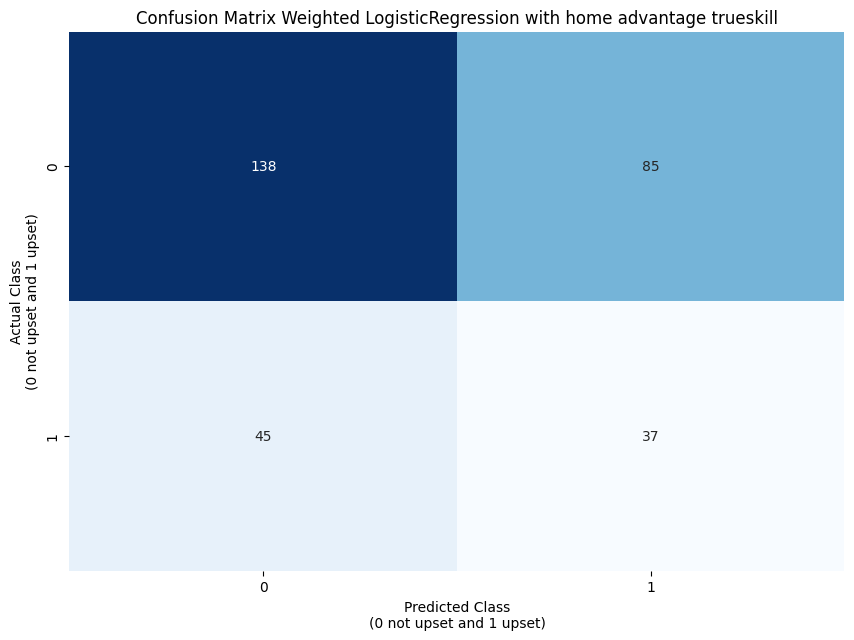

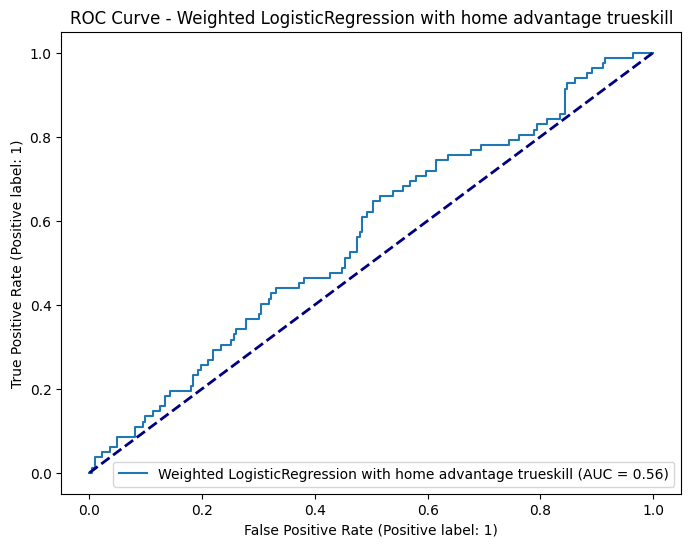

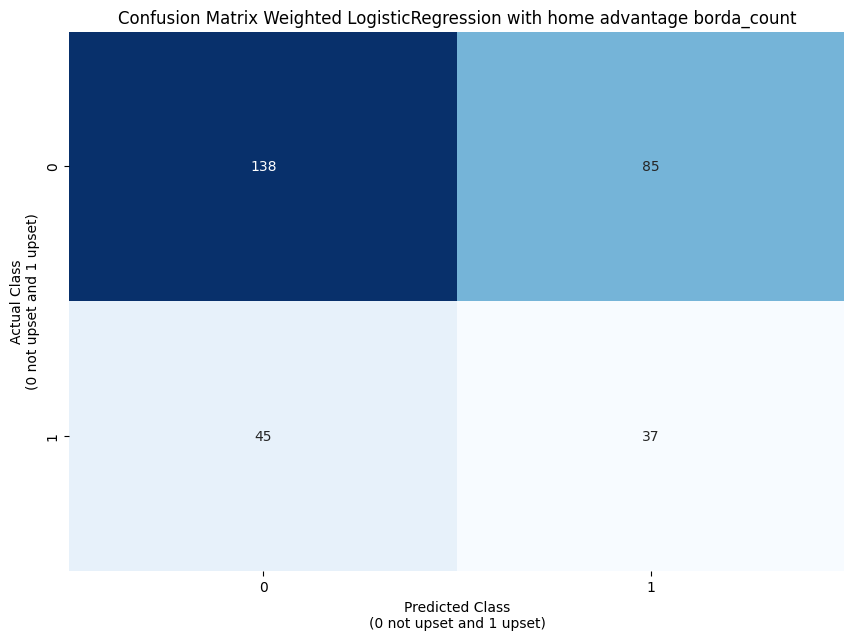

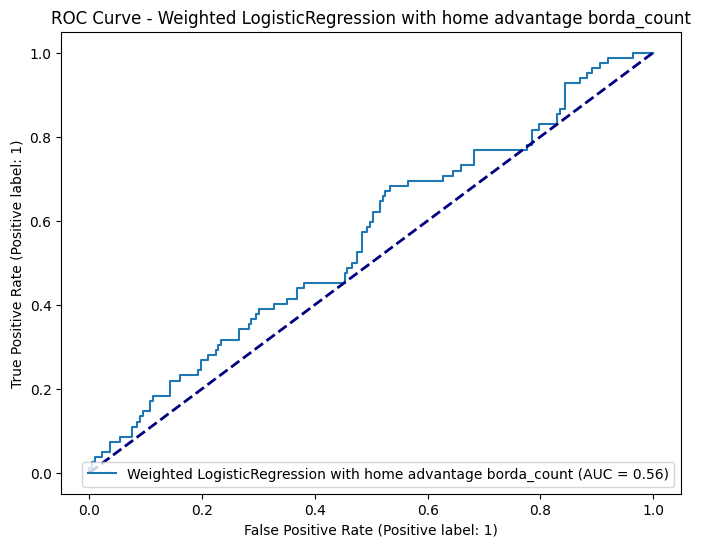

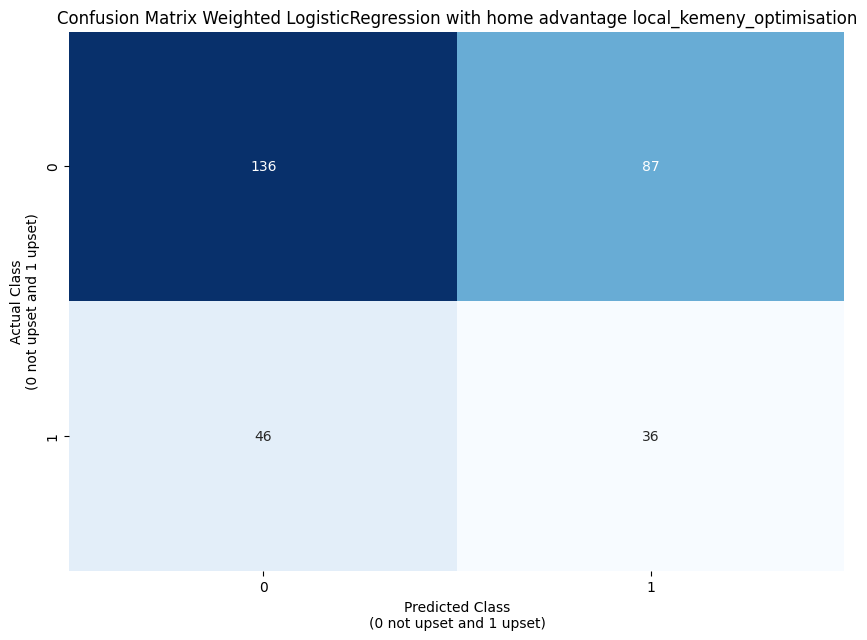

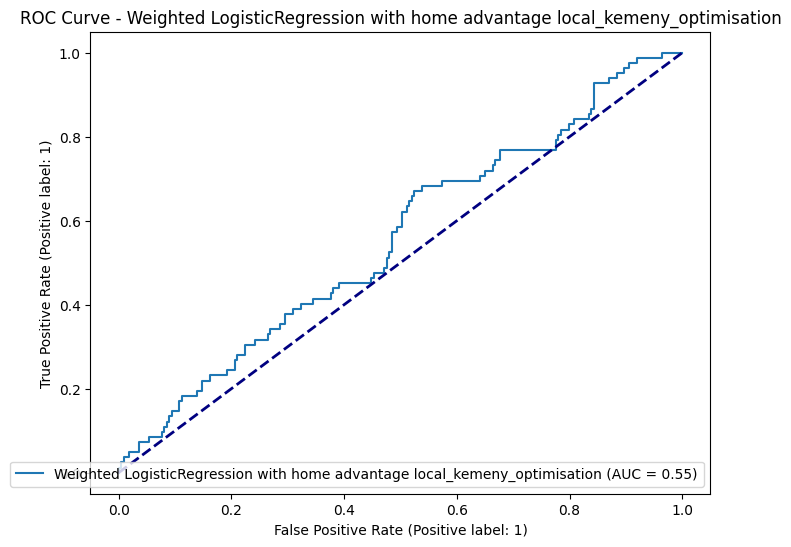

In [ ]:
# Weighted Logistc Regression with home advatange
model_name = "Weighted LogisticRegression with home advantage"
random_state= 47

# Function to calculate weights
def calculate_weights(y):
    class_counts = y.value_counts()
    total_samples = len(y)
    return {class_label: int(round((1 - (count / total_samples)) * 100))
            for class_label, count in class_counts.items()}

# Empty df for consolidating confusion report results
all_results_df_wlrh = pd.DataFrame(columns=['metric_id', 'metric'])

# Define the ranking systems
ranking_systems = ['no_ranking','round_3_position', 'massey', 'colley', 'keener', 'trueskill', 'borda_count', 'local_kemeny_optimisation']

# Get all columns except the target and ranking columns
target_variable = 'target_variable'
base_features = [col for col in fa_cup_raw_features_df.columns if col != target_variable and not any(f"{team}_{ranking}" in col for team in ['home_team', 'away_team'] for ranking in ranking_systems)]


# Identify numeric and categorical columns
numeric_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ranking_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Define cross-validation strategy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

# Loop through each ranking system
for ranking in ranking_systems:
    model_name_ranking = f"{model_name} {ranking}"
    print(model_name_ranking)

    if ranking == 'no_ranking':
        # Use all base features without ranking
        X = fa_cup_raw_features_df[base_features]
    else:
        # Prepare the feature set for the current ranking system to Include ranking features
        current_features = base_features + [f'home_team_{ranking}', f'away_team_{ranking}']
        X = fa_cup_raw_features_df[current_features]

    y = fa_cup_raw_features_df['target_variable']

    # Initialize lists to store results for each fold of the model
    fold_accuracies = []
    confusion_matrices = []
    classification_reports = []
    all_y_true = []
    all_y_pred = []
    all_y_pred_proba = []  # Store probabilities for ROC

    # Perform cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]


        # Add home advantage factor
        X_train, home_advantage_column = add_home_advantage(X_train)
        X_val, _ = add_home_advantage(X_val)

        # Update numeric_features to include the home advantage column
        numeric_features_with_ha = [home_advantage_column] + numeric_features

        # Update preprocessor with current features including home advantage
        if ranking == 'no_ranking':
            preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, numeric_features),
                    ('cat', categorical_transformer, categorical_features)
                ], verbose_feature_names_out=False)

        else:
            preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, numeric_features),
                    ('cat', categorical_transformer, categorical_features),
                    ('rank', numeric_transformer, [f'home_team_{ranking}', f'away_team_{ranking}'])
                ], verbose_feature_names_out=False)

        # Fit preprocessor and transform data
        X_train_preprocessed = preprocessor.fit_transform(X_train)
        X_val_preprocessed = preprocessor.transform(X_val)

        # Get feature names after preprocessing
        feature_names = preprocessor.get_feature_names_out()

        # Convert to DataFrame
        X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=feature_names, index=X_train.index)
        X_val_preprocessed_df = pd.DataFrame(X_val_preprocessed, columns=feature_names, index=X_val.index)

        # Calculate weights using only training data
        weights = calculate_weights(y_train)

        # Create pipeline
        model = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', LogisticRegression(class_weight=weights,max_iter=1000))
        ])


        # Simple check for missing values
        if X_train_preprocessed_df.isnull().values.any() or X_val_preprocessed_df.isnull().values.any():
          raise ValueError("Missing values found in preprocessed data. Please review your preprocessing steps.")

        #print(f"\nFold {fold}")
        #print("Preprocessed Train data:")
        #display(pd.concat([X_train_preprocessed_df, y_train], axis=1))
        #print("\nPreprocessed Test data:")
        #display(pd.concat([X_val_preprocessed_df, y_val], axis=1))

        # Fit and predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        y_pred_proba = model.predict_proba(X_val)[:, 1]  # Probabilities for the positive class and ROC curve/AUC Score

        # Calculate accuracy
        accuracy = accuracy_score(y_val, y_pred)
        fold_accuracies.append(accuracy)

        # Confusion matrix
        cm = confusion_matrix(y_val, y_pred)
        confusion_matrices.append(cm)

        # Generate classification report
        cr = classification_report(y_val, y_pred, output_dict=True)
        classification_reports.append(cr)

        # Store true and predicted values for later analysis
        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)
        all_y_pred_proba.extend(y_pred_proba)

        print(f"Fold {fold} Accuracy: {accuracy:.3f}")

    # Calculate average accuracy
    avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    print(f"Average Accuracy: {avg_accuracy:.3f}")

    # Create and display results using existing function
    results_df, cm_fig, roc_fig = create_model_results_df(all_y_true, all_y_pred, fold_accuracies,  all_y_pred_proba, model_name_ranking)
    results_df = results_df.reset_index()
    results_df['metric_id'] = results_df.index + 1
    results_df = results_df[['metric_id', 'metric', model_name_ranking]]

    all_results_df_wlrh = all_results_df_wlrh.merge(results_df, on=['metric_id', 'metric'], how='outer')

display(all_results_df_wlrh)


MLP Classifier Neural Network no_ranking
Fold 1 Accuracy: 0.984
Fold 2 Accuracy: 0.984
Fold 3 Accuracy: 0.934
Fold 4 Accuracy: 0.984
Fold 5 Accuracy: 0.852
Average Accuracy: 0.948
MLP Classifier Neural Network round_3_position
Fold 1 Accuracy: 0.984
Fold 2 Accuracy: 0.967
Fold 3 Accuracy: 0.951
Fold 4 Accuracy: 0.967
Fold 5 Accuracy: 0.902
Average Accuracy: 0.954
MLP Classifier Neural Network massey
Fold 1 Accuracy: 0.984
Fold 2 Accuracy: 0.951
Fold 3 Accuracy: 0.951
Fold 4 Accuracy: 0.951
Fold 5 Accuracy: 0.836
Average Accuracy: 0.934
MLP Classifier Neural Network colley
Fold 1 Accuracy: 0.984
Fold 2 Accuracy: 0.967
Fold 3 Accuracy: 0.934
Fold 4 Accuracy: 0.967
Fold 5 Accuracy: 0.902
Average Accuracy: 0.951
MLP Classifier Neural Network keener
Fold 1 Accuracy: 0.984
Fold 2 Accuracy: 0.967
Fold 3 Accuracy: 0.934
Fold 4 Accuracy: 0.967
Fold 5 Accuracy: 0.836
Average Accuracy: 0.938
MLP Classifier Neural Network trueskill
Fold 1 Accuracy: 0.984
Fold 2 Accuracy: 0.984
Fold 3 Accuracy: 0.9

metric_id                                       metric  \
0           1                    Cross-validation Accuracy   
1           2                             Overall Accuracy   
2           3   Confusion Matrix - True Negative (Class 0)   
3           4  Confusion Matrix - False Positive (Class 1)   
4           5  Confusion Matrix - False Negative (Class 0)   
5           6   Confusion Matrix - True Positive (Class 1)   
6           7                          Precision (Class 0)   
7           8                             Recall (Class 0)   
8           9                           F1-score (Class 0)   
9          10                          Precision (Class 1)   
10         11                             Recall (Class 1)   
11         12                           F1-score (Class 1)   
12         13                          Macro avg Precision   
13         14                             Macro avg Recall   
14         15                           Macro avg F1-score   
15         16                       Weighted avg Precision   
16         17                          Weighted avg Recall   
17         18                        Weighted avg F1-score   
18         19                                      AUC-ROC   

   MLP Classifier Neural Network no_ranking  \
0                                     0.948   
1                                     0.948   
2                                   221.000   
3                                     2.000   
4                                    14.000   
5                                    68.000   
6                                     0.940   
7                                     0.991   
8                                     0.965   
9                                     0.971   
10                                    0.829   
11                                    0.895   
12                                    0.956   
13                                    0.910   
14                                    0.930   
15                                    0.949   
16                                    0.948   
17                                    0.946   
18                                    0.981   

   MLP Classifier Neural Network round_3_position  \
0                                           0.954   
1                                           0.954   
2                                         219.000   
3                                           4.000   
4                                          10.000   
5                                          72.000   
6                                           0.956   
7                                           0.982   
8                                           0.969   
9                                           0.947   
10                                          0.878   
11                                          0.911   
12                                          0.952   
13                                          0.930   
14                                          0.940   
15                                          0.954   
16                                          0.954   
17                                          0.954   
18                                          0.989   

   MLP Classifier Neural Network massey MLP Classifier Neural Network colley  \
0                                 0.934                                0.951   
1                                 0.934                                0.951   
2                               220.000                              219.000   
3                                 3.000                                4.000   
4                                17.000                               11.000   
5                                65.000                               71.000   
6                                 0.928                                0.952   
7                                 0.987                                0.982   
8                                 0.957  

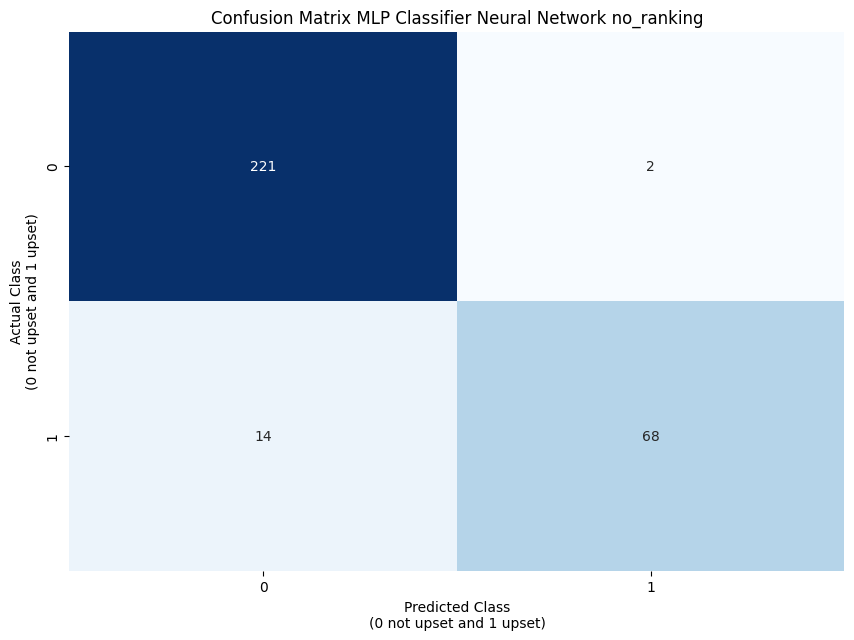

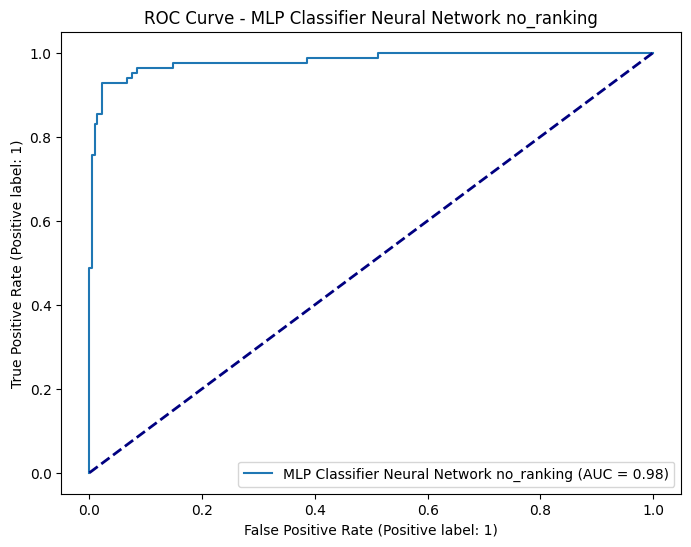

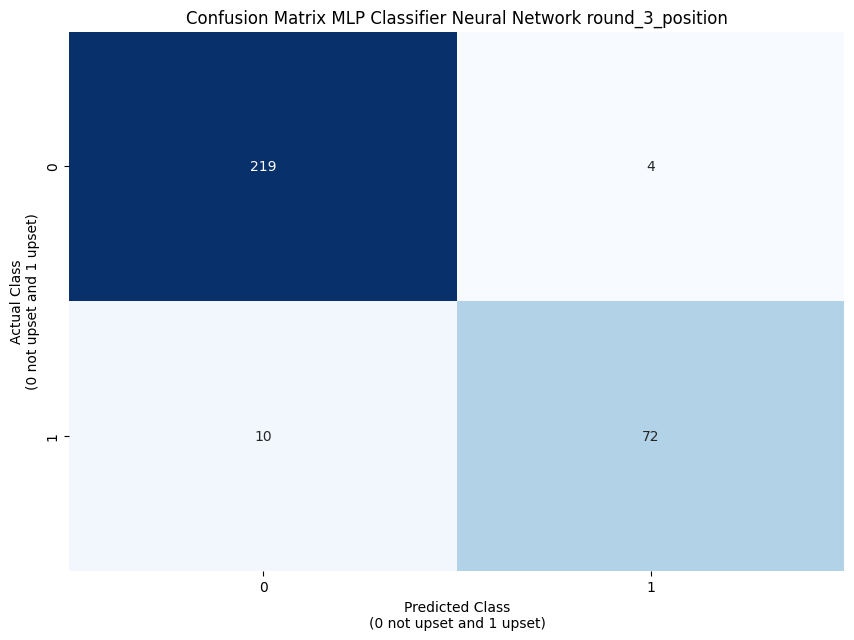

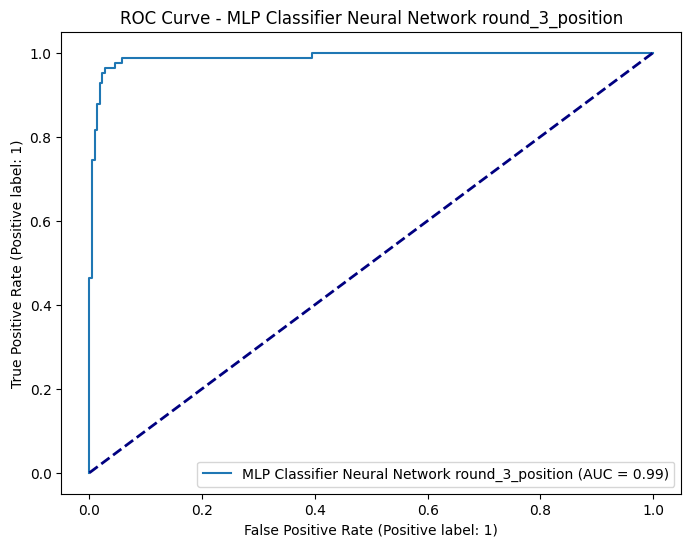

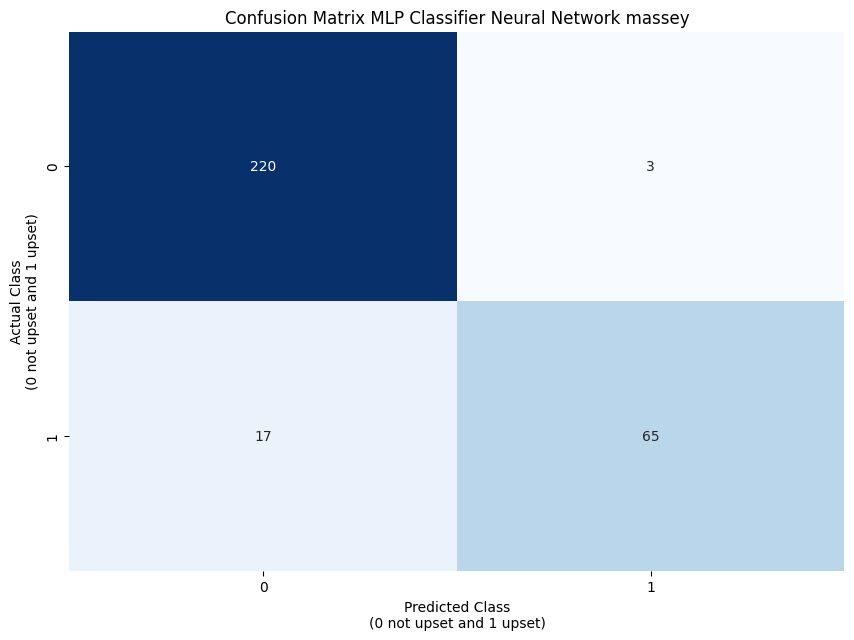

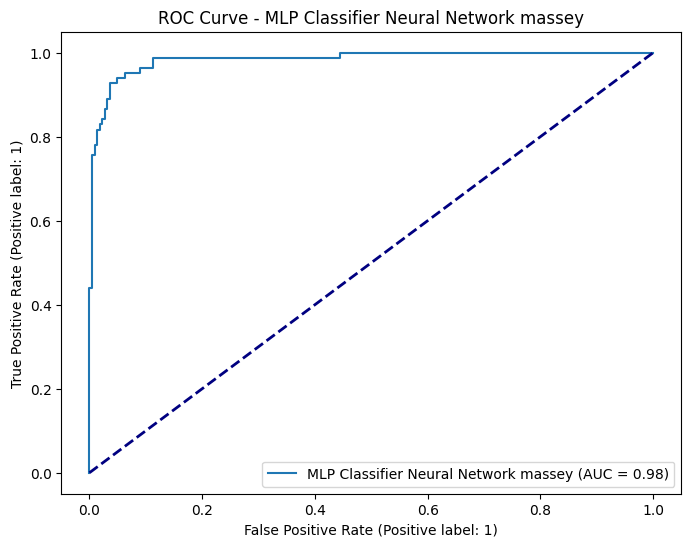

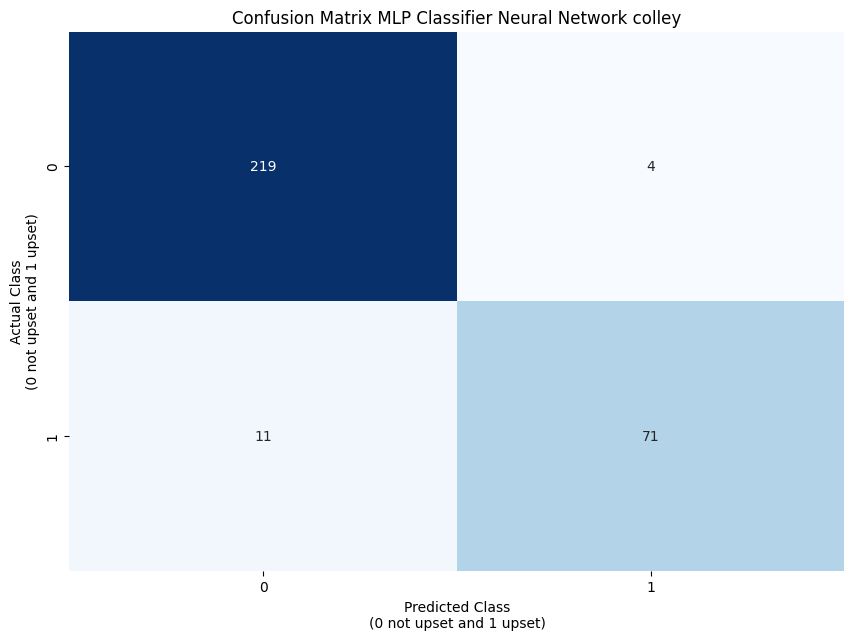

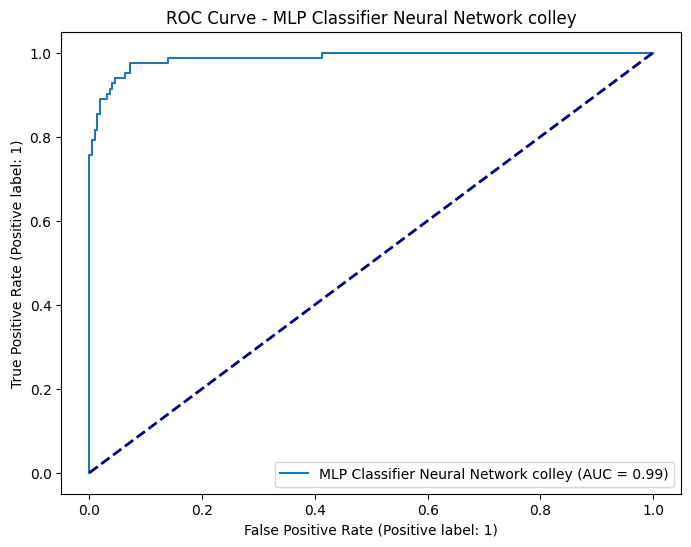

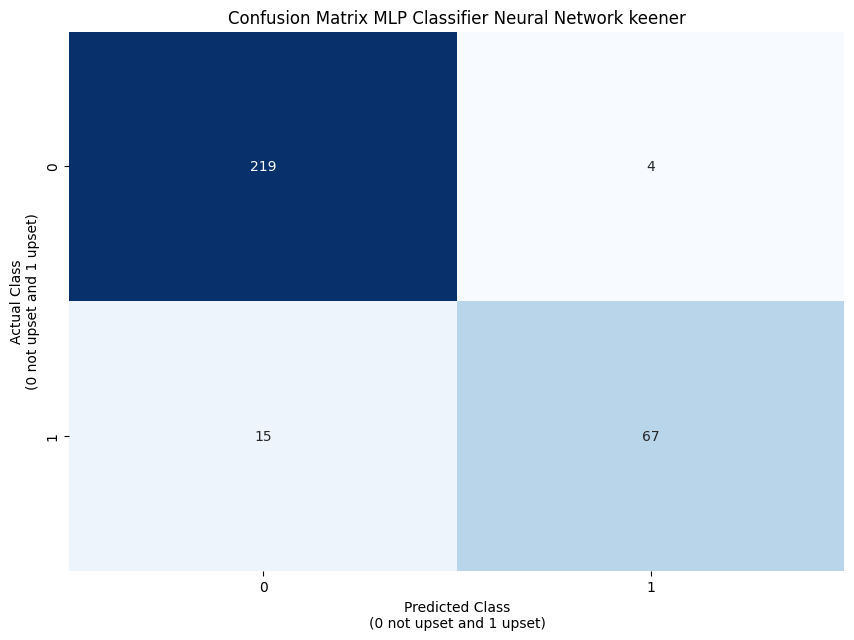

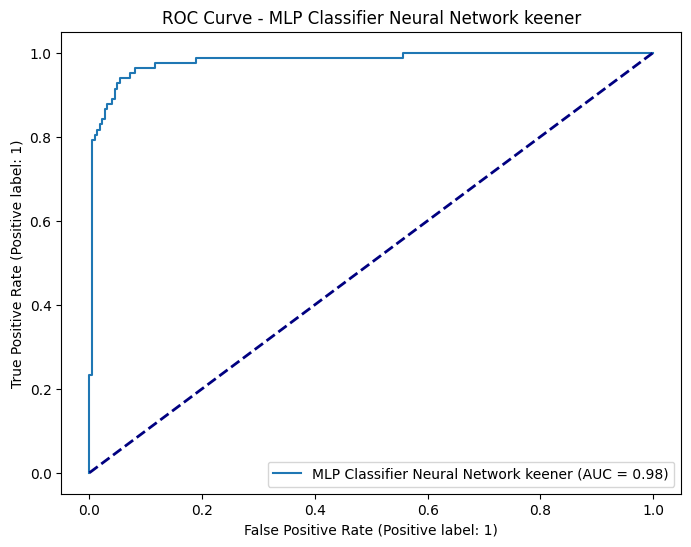

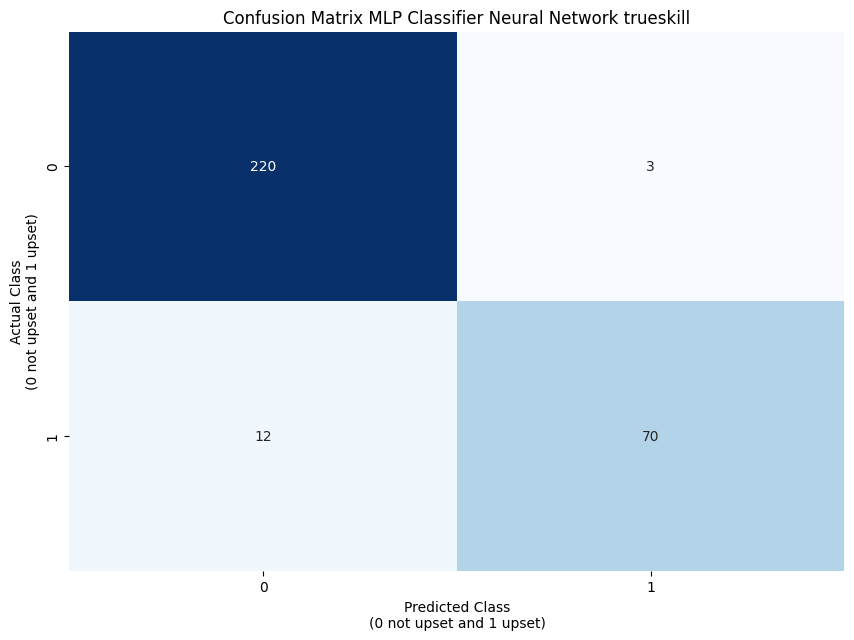

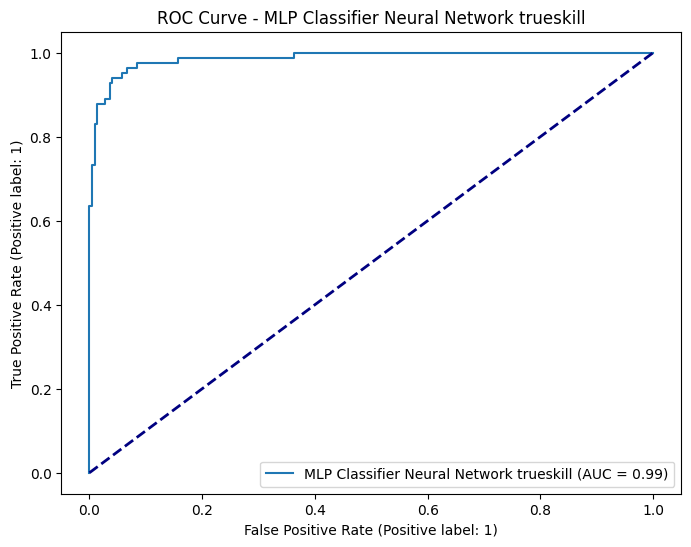

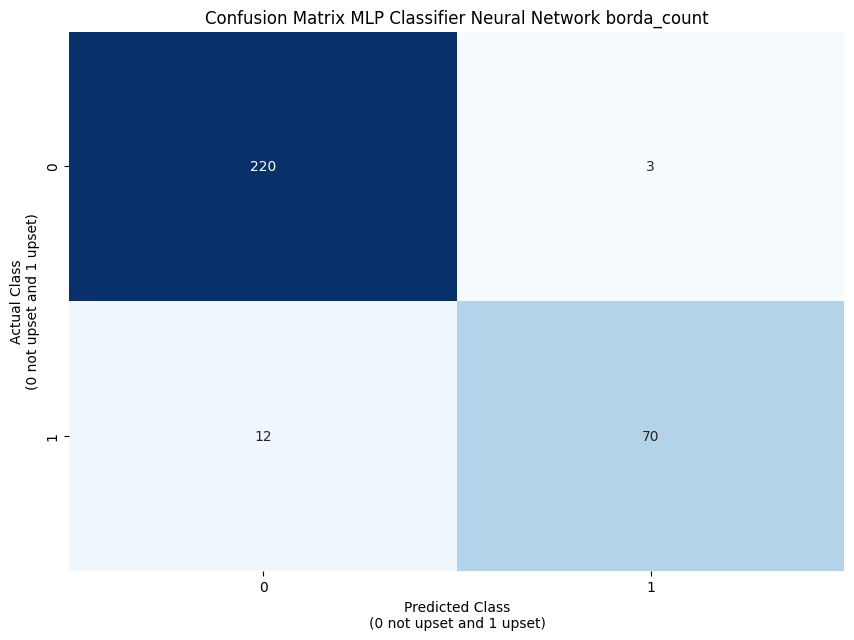

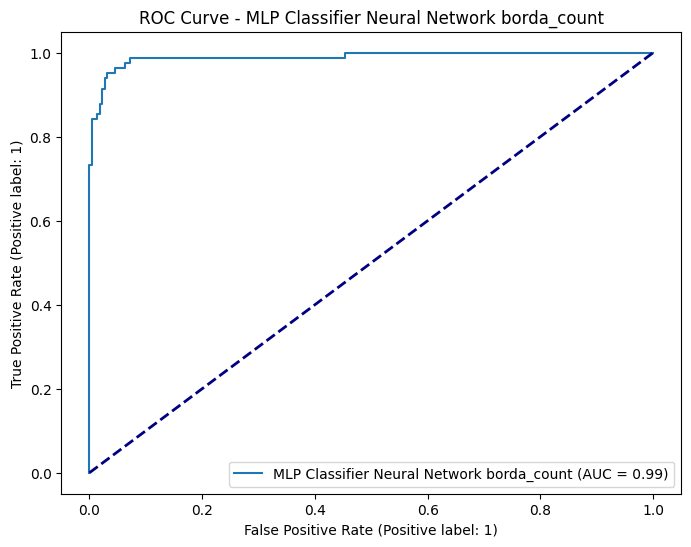

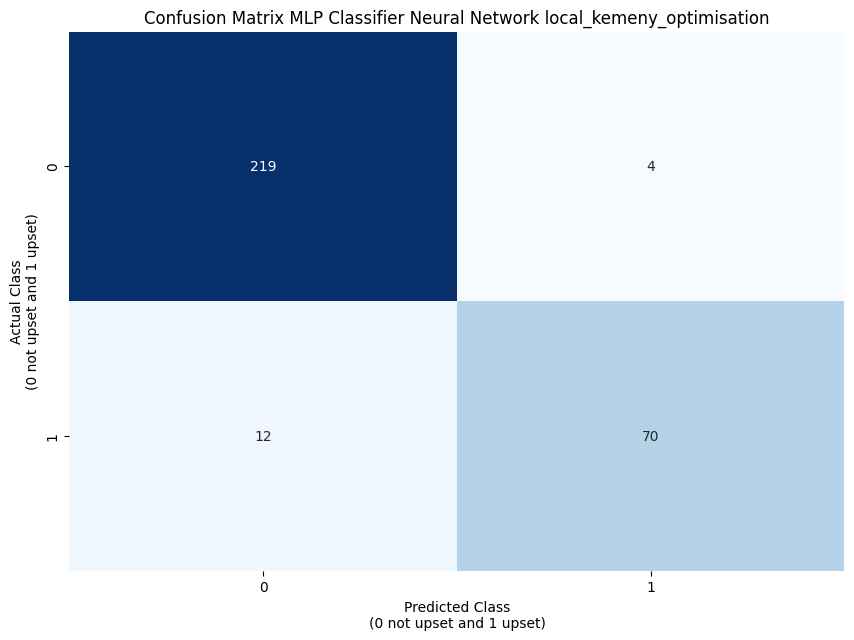

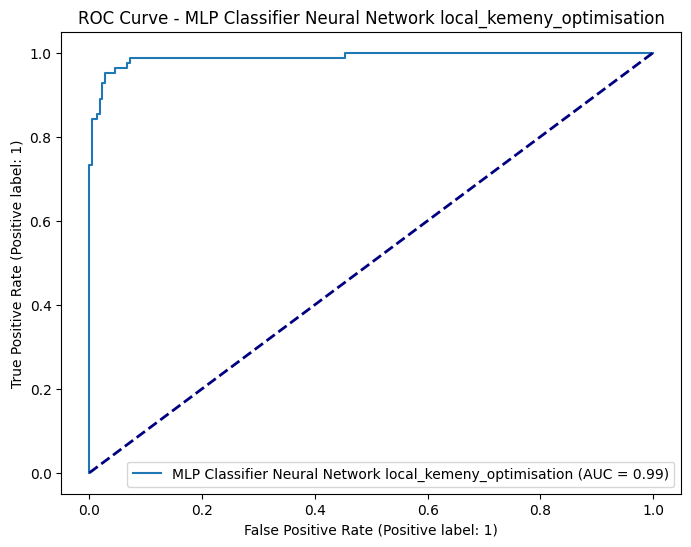

In [ ]:
# MCP Neural Network
model_name = "MLP Classifier Neural Network"
random_state= 47

# Empty df for consolidating confusion report results
all_results_df_nn = pd.DataFrame(columns=['metric_id', 'metric'])

# Define the ranking systems
ranking_systems = ['no_ranking','round_3_position', 'massey', 'colley', 'keener', 'trueskill', 'borda_count', 'local_kemeny_optimisation']

# Get all columns except the target and ranking columns
target_variable = 'target_variable'
base_features = [col for col in fa_cup_raw_features_df.columns if col != target_variable and not any(f"{team}_{ranking}" in col for team in ['home_team', 'away_team'] for ranking in ranking_systems)]


# Identify numeric and categorical columns
numeric_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ranking_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Define cross-validation strategy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

# Loop through each ranking system
for ranking in ranking_systems:
    #print(f"\nRunning model for {ranking} ranking system")
    model_name_ranking = f"{model_name} {ranking}"
    print(model_name_ranking)

    if ranking == 'no_ranking':
        # Use all base features without ranking
        X = fa_cup_raw_features_df[base_features]
    else:
        # Prepare the feature set for the current ranking system to Include ranking features
        current_features = base_features + [f'home_team_{ranking}', f'away_team_{ranking}']
        X = fa_cup_raw_features_df[current_features]

    y = fa_cup_raw_features_df['target_variable']

    # Initialize lists to store results for each fold of the model
    fold_accuracies = []
    confusion_matrices = []
    classification_reports = []
    all_y_true = []
    all_y_pred = []
    all_y_pred_proba = []  # Store probabilities for ROC

    # Perform cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Update preprocessor with current features including home advantage
        if ranking == 'no_ranking':
            preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, numeric_features),
                    ('cat', categorical_transformer, categorical_features)
                ], verbose_feature_names_out=False)

        else:
            preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, numeric_features),
                    ('cat', categorical_transformer, categorical_features),
                    ('rank', numeric_transformer, [f'home_team_{ranking}', f'away_team_{ranking}'])
                ], verbose_feature_names_out=False)

        # Fit preprocessor and transform data
        X_train_preprocessed = preprocessor.fit_transform(X_train)
        X_val_preprocessed = preprocessor.transform(X_val)

        # Create pipeline
        model = Pipeline([
          ('preprocessor', preprocessor),
          ('classifier', MLPClassifier(hidden_layer_sizes=(10), max_iter=10000, random_state=random_state))
          ])

        # Get feature names after preprocessing
        feature_names = preprocessor.get_feature_names_out()

        # Convert to DataFrame
        X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=feature_names, index=X_train.index)
        X_val_preprocessed_df = pd.DataFrame(X_val_preprocessed, columns=feature_names, index=X_val.index)

        # Simple check for missing values
        if X_train_preprocessed_df.isnull().values.any() or X_val_preprocessed_df.isnull().values.any():
          raise ValueError("Missing values found in preprocessed data. Please review your preprocessing steps.")

        # Fit and predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        y_pred_proba = model.predict_proba(X_val)[:, 1]  # Probabilities for the positive class and ROC curve/AUC Score

        # Calculate accuracy
        accuracy = accuracy_score(y_val, y_pred)
        fold_accuracies.append(accuracy)

        # Confusion matrix
        cm = confusion_matrix(y_val, y_pred)
        confusion_matrices.append(cm)

        # Generate classification report
        cr = classification_report(y_val, y_pred, output_dict=True)
        classification_reports.append(cr)

        # Store true and predicted values for later analysis
        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)
        all_y_pred_proba.extend(y_pred_proba)

        print(f"Fold {fold} Accuracy: {accuracy:.3f}")

    # Calculate average accuracy
    avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    print(f"Average Accuracy: {avg_accuracy:.3f}")

    # Create and display results using existing function
    results_df, cm_fig, roc_fig = create_model_results_df(all_y_true, all_y_pred, fold_accuracies,  all_y_pred_proba, model_name_ranking)
    results_df = results_df.reset_index()
    results_df['metric_id'] = results_df.index + 1
    results_df = results_df[['metric_id', 'metric', model_name_ranking]]

    all_results_df_nn = all_results_df_nn.merge(results_df, on=['metric_id', 'metric'], how='outer')

display(all_results_df_nn)


MLP Classifier Neural Network with home advantage no_ranking
Fold 1 Accuracy: 0.984
Fold 2 Accuracy: 0.984
Fold 3 Accuracy: 0.934
Fold 4 Accuracy: 0.984
Fold 5 Accuracy: 0.852
Average Accuracy: 0.948
MLP Classifier Neural Network with home advantage round_3_position
Fold 1 Accuracy: 0.984
Fold 2 Accuracy: 0.967
Fold 3 Accuracy: 0.951
Fold 4 Accuracy: 0.967
Fold 5 Accuracy: 0.902
Average Accuracy: 0.954
MLP Classifier Neural Network with home advantage massey
Fold 1 Accuracy: 0.984
Fold 2 Accuracy: 0.951
Fold 3 Accuracy: 0.951
Fold 4 Accuracy: 0.951
Fold 5 Accuracy: 0.836
Average Accuracy: 0.934
MLP Classifier Neural Network with home advantage colley
Fold 1 Accuracy: 0.984
Fold 2 Accuracy: 0.967
Fold 3 Accuracy: 0.934
Fold 4 Accuracy: 0.967
Fold 5 Accuracy: 0.902
Average Accuracy: 0.951
MLP Classifier Neural Network with home advantage keener
Fold 1 Accuracy: 0.984
Fold 2 Accuracy: 0.967
Fold 3 Accuracy: 0.934
Fold 4 Accuracy: 0.967
Fold 5 Accuracy: 0.836
Average Accuracy: 0.938
MLP Cl

metric_id                                       metric  \
0           1                    Cross-validation Accuracy   
1           2                             Overall Accuracy   
2           3   Confusion Matrix - True Negative (Class 0)   
3           4  Confusion Matrix - False Positive (Class 1)   
4           5  Confusion Matrix - False Negative (Class 0)   
5           6   Confusion Matrix - True Positive (Class 1)   
6           7                          Precision (Class 0)   
7           8                             Recall (Class 0)   
8           9                           F1-score (Class 0)   
9          10                          Precision (Class 1)   
10         11                             Recall (Class 1)   
11         12                           F1-score (Class 1)   
12         13                          Macro avg Precision   
13         14                             Macro avg Recall   
14         15                           Macro avg F1-score   
15         16                       Weighted avg Precision   
16         17                          Weighted avg Recall   
17         18                        Weighted avg F1-score   
18         19                                      AUC-ROC   

   MLP Classifier Neural Network with home advantage no_ranking  \
0                                               0.948             
1                                               0.948             
2                                             221.000             
3                                               2.000             
4                                              14.000             
5                                              68.000             
6                                               0.940             
7                                               0.991             
8                                               0.965             
9                                               0.971             
10                                              0.829             
11                                              0.895             
12                                              0.956             
13                                              0.910             
14                                              0.930             
15                                              0.949             
16                                              0.948             
17                                              0.946             
18                                              0.981             

   MLP Classifier Neural Network with home advantage round_3_position  \
0                                               0.954                   
1                                               0.954                   
2                                             219.000                   
3                                               4.000                   
4                                              10.000                   
5                                              72.000                   
6                                               0.956                   
7                                               0.982                   
8                                               0.969                   
9                                               0.947                   
10                                              0.878                   
11                                              0.911                   
12                                              0.952                   
13                                              0.930                   
14                                              0.940                   
15                                              0.954                   
16                                              0.954                   
17                                              0.954                   
18                                 

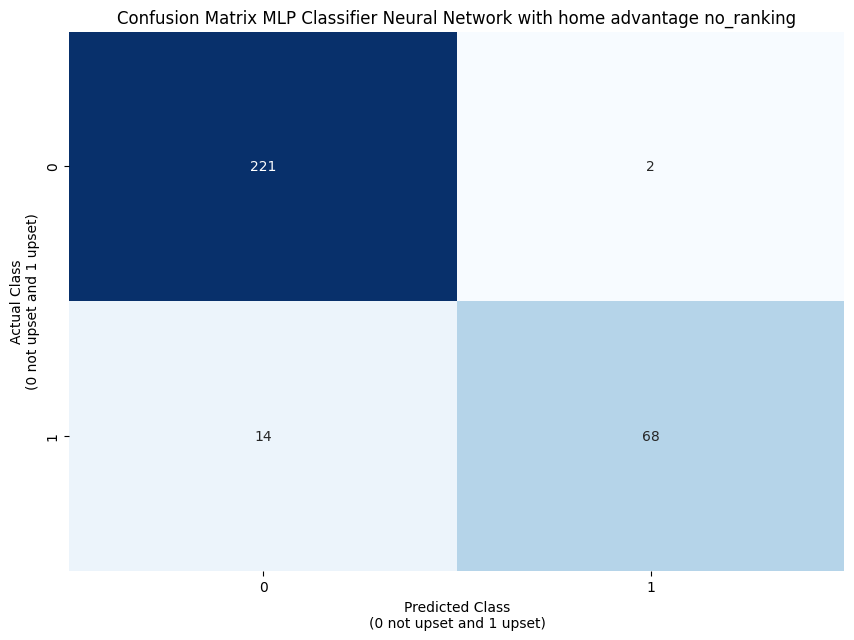

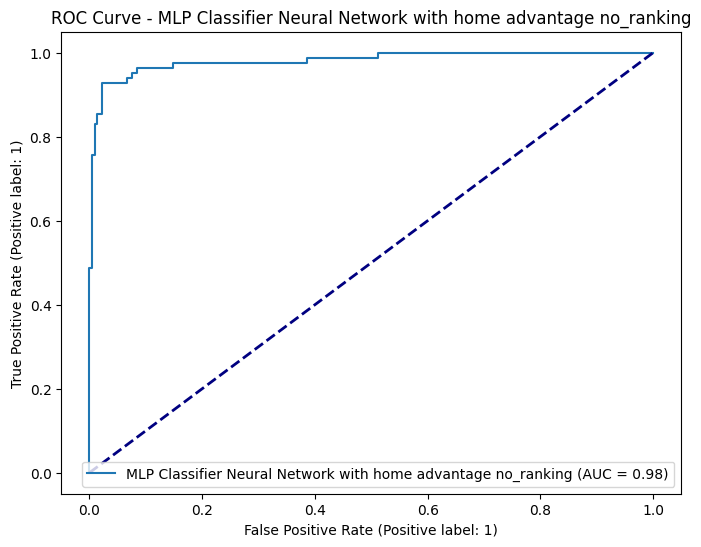

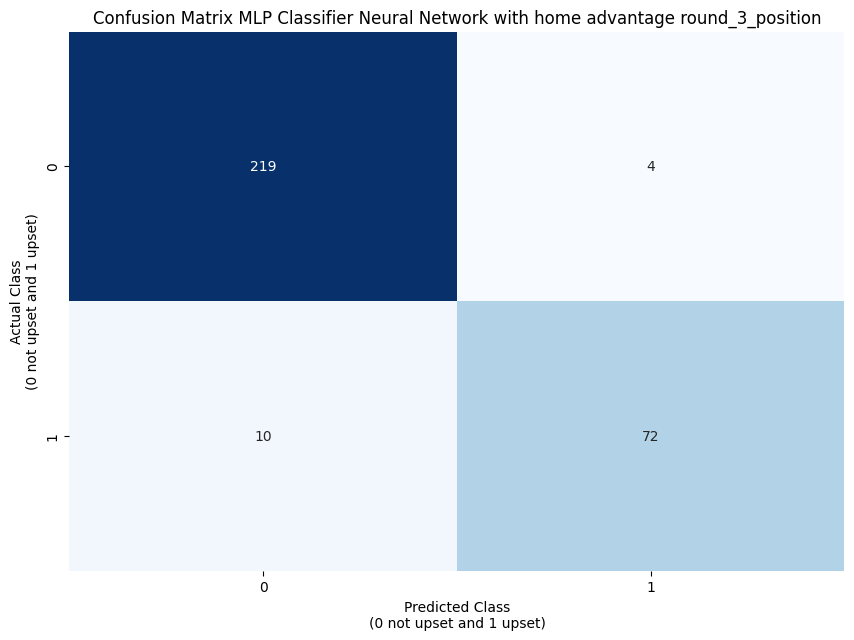

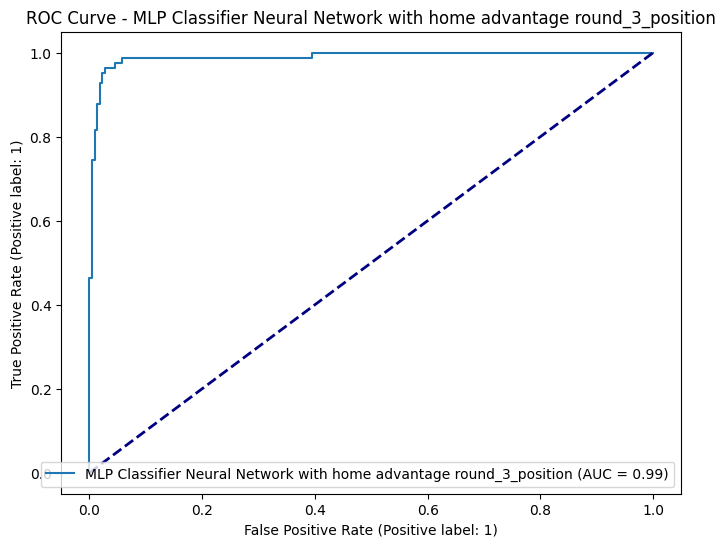

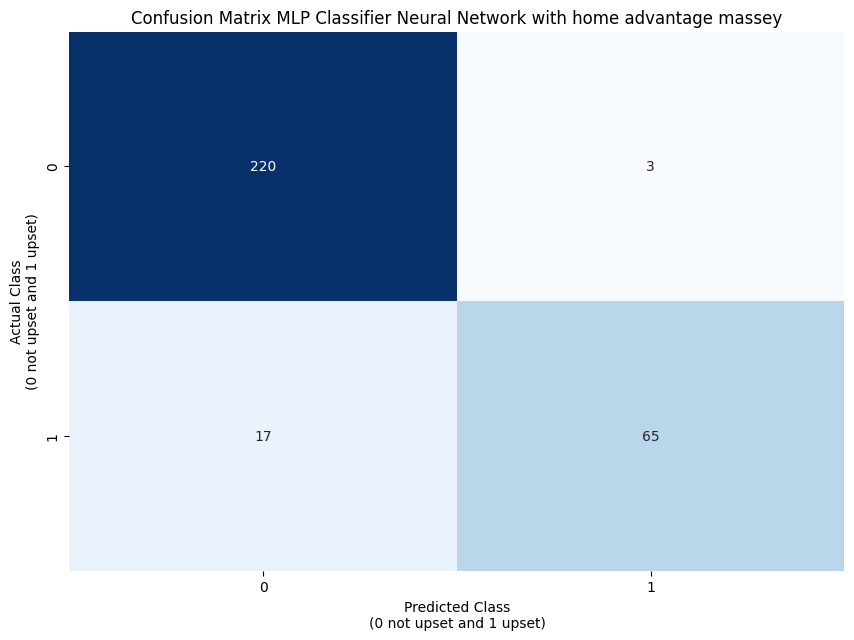

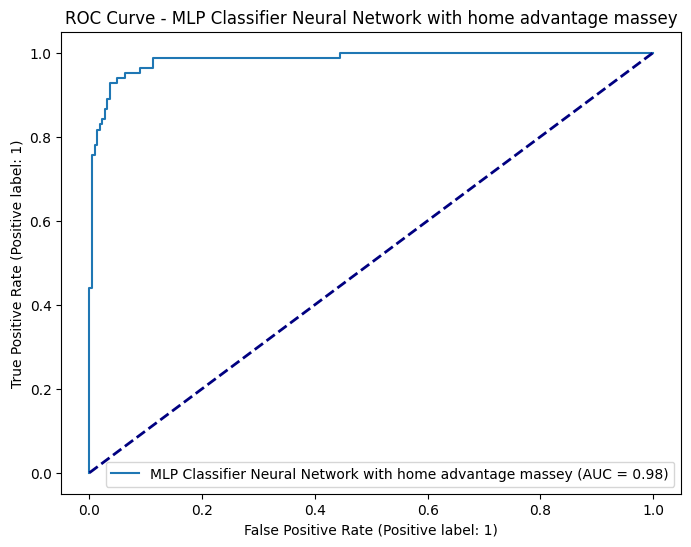

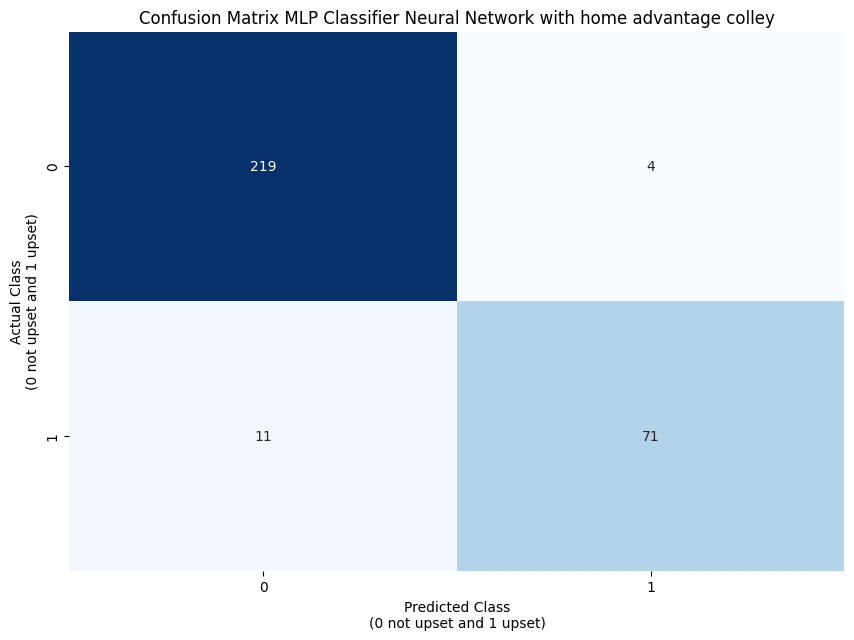

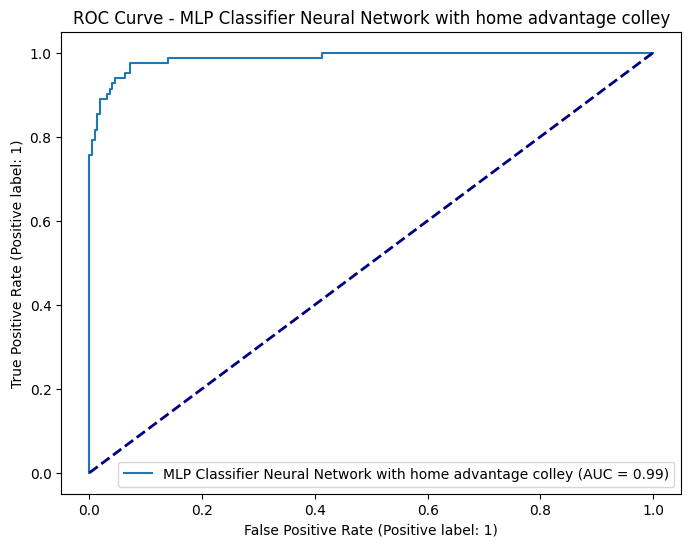

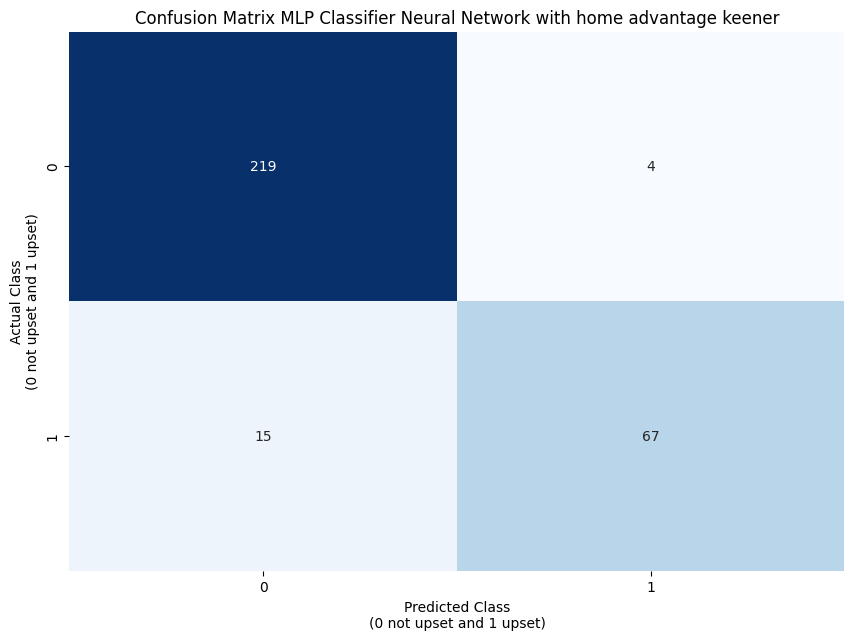

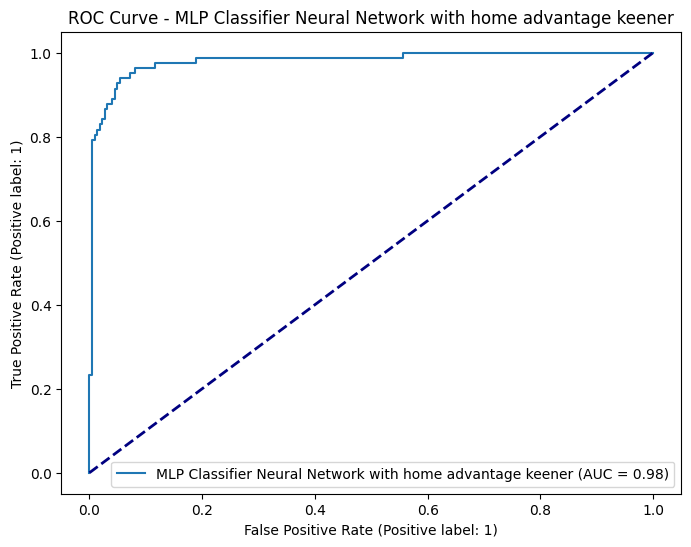

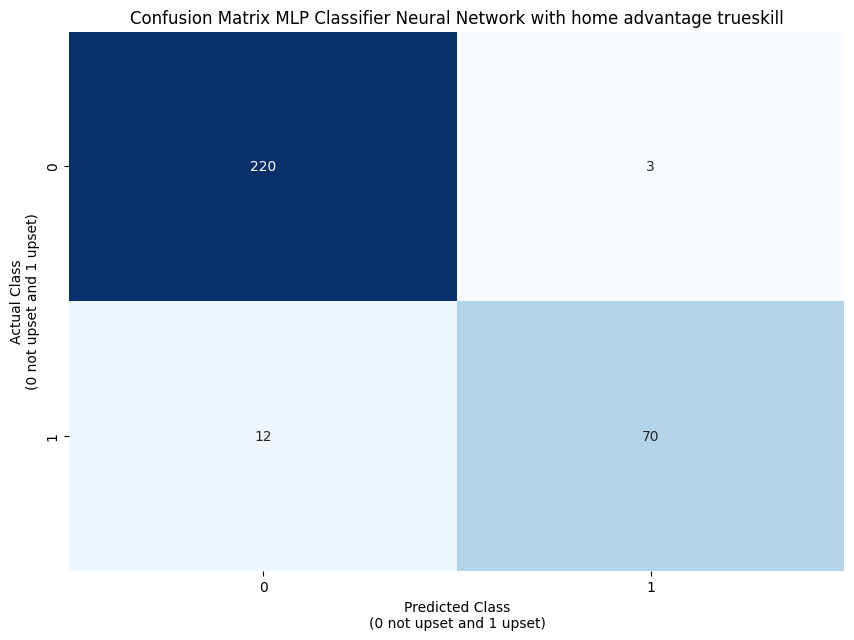

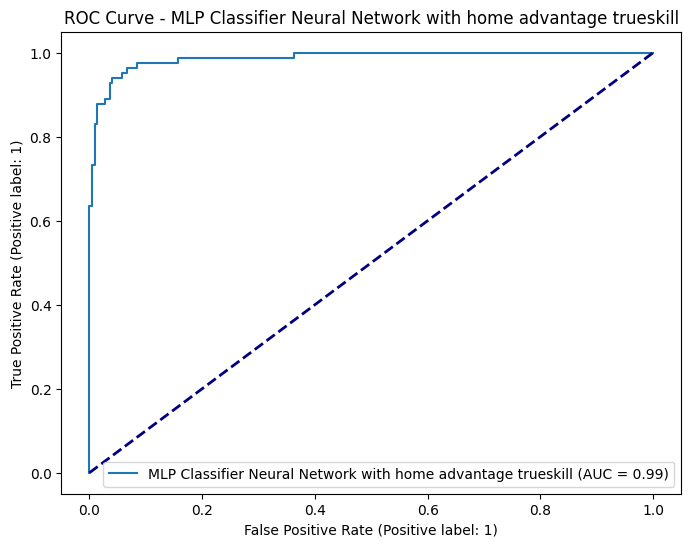

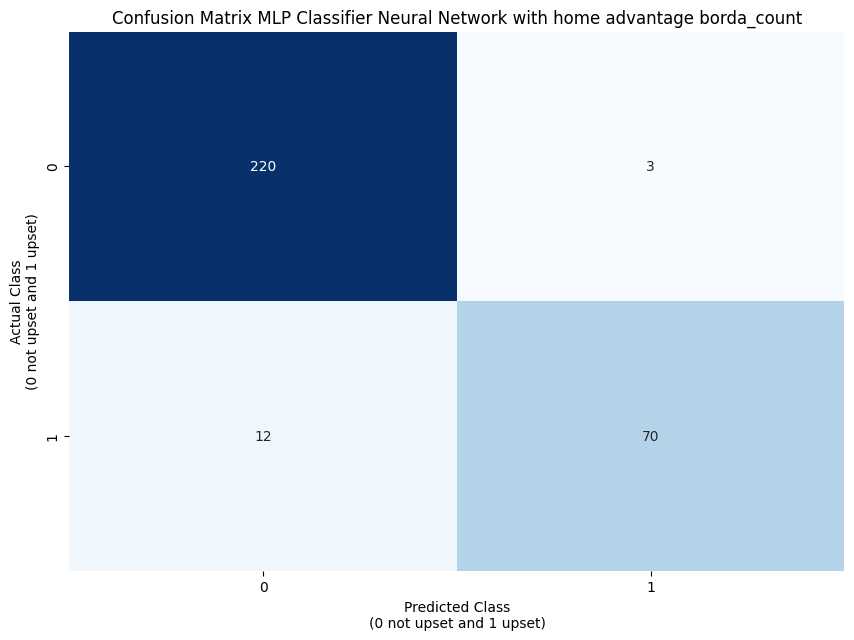

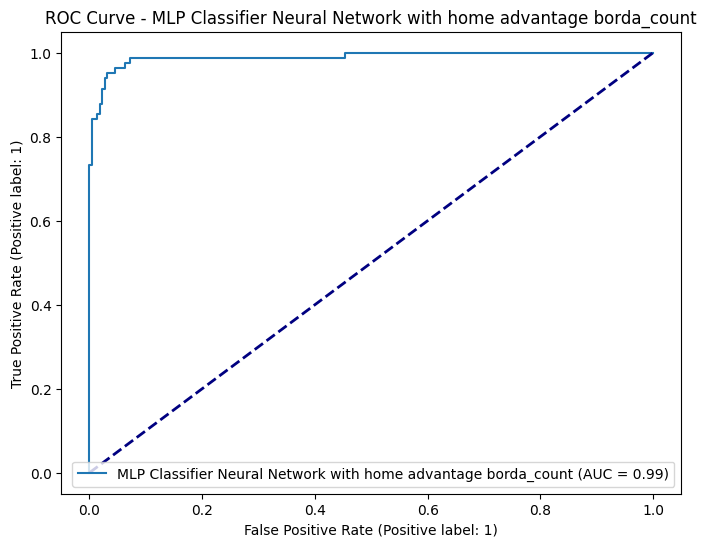

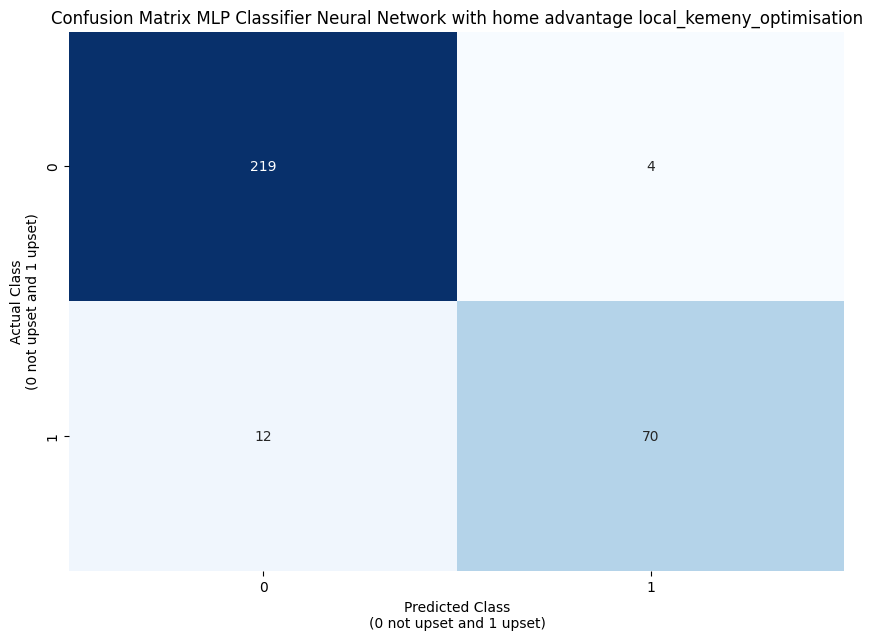

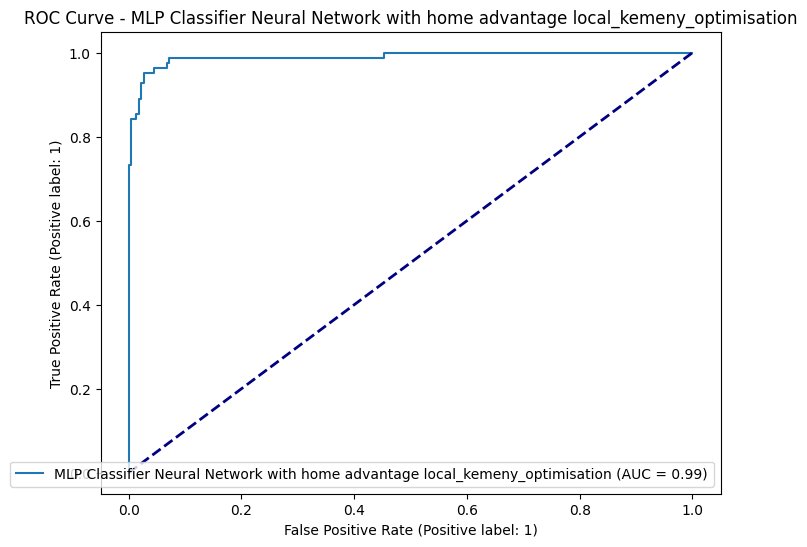

In [ ]:
# MCP Neural Network with home advantage
model_name = "MLP Classifier Neural Network with home advantage"
random_state= 47

# Empty df for consolidating confusion report results
all_results_df_nnh = pd.DataFrame(columns=['metric_id', 'metric'])

# Define the ranking systems
ranking_systems = ['no_ranking','round_3_position', 'massey', 'colley', 'keener', 'trueskill', 'borda_count', 'local_kemeny_optimisation']

# Get all columns except the target and ranking columns
target_variable = 'target_variable'
base_features = [col for col in fa_cup_raw_features_df.columns if col != target_variable and not any(f"{team}_{ranking}" in col for team in ['home_team', 'away_team'] for ranking in ranking_systems)]


# Identify numeric and categorical columns
numeric_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = fa_cup_raw_features_df[base_features].select_dtypes(include=['object']).columns.tolist()

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
     ('imputer', SimpleImputer(strategy='most_frequent')),
     ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

ranking_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# Define cross-validation strategy
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

# Loop through each ranking system
for ranking in ranking_systems:
    #print(f"\nRunning model for {ranking} ranking system")
    model_name_ranking = f"{model_name} {ranking}"
    print(model_name_ranking)

    if ranking == 'no_ranking':
        # Use all base features without ranking
        X = fa_cup_raw_features_df[base_features]
    else:
        # Prepare the feature set for the current ranking system to Include ranking features
        current_features = base_features + [f'home_team_{ranking}', f'away_team_{ranking}']
        X = fa_cup_raw_features_df[current_features]

    y = fa_cup_raw_features_df['target_variable']

    # Initialize lists to store results for each fold of the model
    fold_accuracies = []
    confusion_matrices = []
    classification_reports = []
    all_y_true = []
    all_y_pred = []
    all_y_pred_proba = []  # Store probabilities for ROC

    # Perform cross-validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    for fold, (train_index, val_index) in enumerate(skf.split(X, y), 1):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Add home advantage factor
        X_train, home_advantage_column = add_home_advantage(X_train)
        X_val, _ = add_home_advantage(X_val)

        # Update numeric_features to include the home advantage column
        numeric_features_with_ha = [home_advantage_column] + numeric_features

         # Update preprocessor with current features including home advantage
        if ranking == 'no_ranking':
            preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, numeric_features),
                    ('cat', categorical_transformer, categorical_features)
                ], verbose_feature_names_out=False)

        else:
            preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numeric_transformer, numeric_features),
                    ('cat', categorical_transformer, categorical_features),
                    ('rank', numeric_transformer, [f'home_team_{ranking}', f'away_team_{ranking}'])
                ], verbose_feature_names_out=False)

        # Fit preprocessor and transform data
        X_train_preprocessed = preprocessor.fit_transform(X_train)
        X_val_preprocessed = preprocessor.transform(X_val)


        # Create pipeline
        model = Pipeline([
          ('preprocessor', preprocessor),
          ('classifier', MLPClassifier(hidden_layer_sizes=(10), max_iter=10000, random_state=random_state))
          ])

        # Get feature names after preprocessing
        feature_names = preprocessor.get_feature_names_out()

        # Convert to DataFrame
        X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=feature_names, index=X_train.index)
        X_val_preprocessed_df = pd.DataFrame(X_val_preprocessed, columns=feature_names, index=X_val.index)

        # Simple check for missing values
        if X_train_preprocessed_df.isnull().values.any() or X_val_preprocessed_df.isnull().values.any():
          raise ValueError("Missing values found in preprocessed data. Please review your preprocessing steps.")

        # Fit and predict
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        y_pred_proba = model.predict_proba(X_val)[:, 1]  # Probabilities for the positive class and ROC curve/AUC Score

        # Calculate accuracy
        accuracy = accuracy_score(y_val, y_pred)
        fold_accuracies.append(accuracy)

        # Confusion matrix
        cm = confusion_matrix(y_val, y_pred)
        confusion_matrices.append(cm)

        # Generate classification report
        cr = classification_report(y_val, y_pred, output_dict=True)
        classification_reports.append(cr)

        # Store true and predicted values for later analysis
        all_y_true.extend(y_val)
        all_y_pred.extend(y_pred)
        all_y_pred_proba.extend(y_pred_proba)

        print(f"Fold {fold} Accuracy: {accuracy:.3f}")

    # Calculate average accuracy
    avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
    print(f"Average Accuracy: {avg_accuracy:.3f}")

    # Create and display results using existing function
    results_df, cm_fig, roc_fig = create_model_results_df(all_y_true, all_y_pred, fold_accuracies,  all_y_pred_proba, model_name_ranking)
    results_df = results_df.reset_index()
    results_df['metric_id'] = results_df.index + 1
    results_df = results_df[['metric_id', 'metric', model_name_ranking]]

    all_results_df_nnh = all_results_df_nnh.merge(results_df, on=['metric_id', 'metric'], how='outer')

display(all_results_df_nnh)


In [ ]:
all_results_df_lr = all_results_df_slrh.merge(all_results_df_slr, on=['metric_id', 'metric'], how='outer')
all_results_df_slnn = all_results_df_nn.merge(all_results_df_lr, on=['metric_id', 'metric'], how='outer')
all_results_df = all_results_df_nnh.merge(all_results_df_slnn, on=['metric_id', 'metric'], how='outer')
display(all_results_df)

metric_id                                       metric  \
0           1                    Cross-validation Accuracy   
1           2                             Overall Accuracy   
2           3   Confusion Matrix - True Negative (Class 0)   
3           4  Confusion Matrix - False Positive (Class 1)   
4           5  Confusion Matrix - False Negative (Class 0)   
5           6   Confusion Matrix - True Positive (Class 1)   
6           7                          Precision (Class 0)   
7           8                             Recall (Class 0)   
8           9                           F1-score (Class 0)   
9          10                          Precision (Class 1)   
10         11                             Recall (Class 1)   
11         12                           F1-score (Class 1)   
12         13                          Macro avg Precision   
13         14                             Macro avg Recall   
14         15                           Macro avg F1-score   
15         16                       Weighted avg Precision   
16         17                          Weighted avg Recall   
17         18                        Weighted avg F1-score   

   MLP Classifier Neural Network with home advantage round_3_position  \
0                                               0.974                   
1                                               0.974                   
2                                             221.000                   
3                                               2.000                   
4                                               6.000                   
5                                              76.000                   
6                                               0.974                   
7                                               0.991                   
8                                               0.982                   
9                                               0.974                   
10                                              0.927                   
11                                              0.950                   
12                                              0.974                   
13                                              0.959                   
14                                              0.966                   
15                                              0.974                   
16                                              0.974                   
17                                              0.974                   

   MLP Classifier Neural Network with home advantage massey  \
0                                               0.934         
1                                               0.934         
2                                             216.000         
3                                               7.000         
4                                              13.000         
5                                              69.000         
6                                               0.943         
7                                               0.969         
8                                               0.956         
9                                               0.908         
10                                              0.841         
11                                              0.873         
12                                              0.926         
13                                              0.905         
14                                              0.915         
15                                              0.934         
16                                              0.934         
17                                              0.934         

   MLP Classifier Neural Network with home advantage colley  \
0                                               0.925         
1                                               0.925         
2                                             213.

In [ ]:
# Load updated all ranks df to Big Query so Borda Count can be subsequently queried in local kemeny optimisation
load_dataset_name = 'analysis_layer'
load_table_name = 'lr_ann_model_confusion_matrix_results'
full_table_name = f"{load_dataset_name}.{load_table_name}"
pandas_gbq.to_gbq(all_results_df, full_table_name, project_id='birkbeck-msc-project-422917', if_exists='replace')

100%|██████████| 1/1 [00:00<00:00, 810.81it/s]
